In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
import plotly.graph_objects as ply
import plotly.figure_factory as ff
import plotly.express as px
sns.set(color_codes=True)
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

### Problem Statement 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

#### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

##### Loading the Dataset CSV file of Problem Statement 1.

In [2]:
df_1=pd.read_excel("Election_Data.xlsx",sheet_name=1)

##### Checking the Records of the Dataset.

In [3]:
df_1.head(10) #Head of the Dataset - First 10 Records of the Dataset.¶

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   
5           6  Labour   47                       3                        4   
6           7  Labour   57                       2                        2   
7           8  Labour   77                       3                        4   
8           9  Labour   39                       3                        3   
9          10  Labour   70                       3                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male  
5      4      4       4                    2    male  
6      4      4      11                    2    male  
7      4      1       1                    0    male  
8      4      4      11                    0  female  
9      5      1      11                    2    male

In [4]:
df_1.tail(10) #Tail of the Dataset - Last 10 Records of the Dataset.

Unnamed: 0          vote  age  economic.cond.national  \
1515        1516  Conservative   82                       2   
1516        1517        Labour   30                       3   
1517        1518        Labour   76                       4   
1518        1519        Labour   50                       3   
1519        1520  Conservative   35                       3   
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1515                        2      2      1      11                    2   
1516                        4      4      2       4                    2   
1517                        3      2      2      11                    2   
1518                        4      4      2       5                    2   
1519                        4      4      2       8                    2   
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1515  female  
1516    male  
1517    male  
1518    male  
1519    male  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

##### Dropping the Unnamed: 0 Column & Changing the name of columns.

* We are going to drop the column unnamed:0 as it is useless for the model.

In [5]:
df_1.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df_1.rename(columns ={"economic.cond.national":"economic_cond_national"}, inplace = True)
df_1.rename(columns ={"economic.cond.household":"economic_cond_household"}, inplace = True)
df_1.rename(columns ={"political.knowledge":"political_knowledge"}, inplace = True)




In [7]:
df_1.head(10) #Head of the Dataset after dropping the " Unnamed: 0 " column.

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   
5  Labour   47                       3                        4      4      4   
6  Labour   57                       2                        2      4      4   
7  Labour   77                       3                        4      4      1   
8  Labour   39                       3                        3      4      4   
9  Labour   70                       3                        2      5      1   

   Europe  political_knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male  
5       4                    2    male  
6      11                    2    male  
7       1                    0    male  
8      11                    0  female  
9      11                    2    male

In [8]:
df_1.tail(10) #Tail of the Dataset after dropping the " Unnamed: 0 " column.

vote  age  economic_cond_national  economic_cond_household  \
1515  Conservative   82                       2                        2   
1516        Labour   30                       3                        4   
1517        Labour   76                       4                        3   
1518        Labour   50                       3                        4   
1519  Conservative   35                       3                        4   
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political_knowledge  gender  
1515      2      1      11                    2  female  
1516      4      2       4                    2    male  
1517      2      2      11                    2    male  
1518      4      2       5                    2    male  
1519      4      2       8                    2    male  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female

**Insights**
* Now we have all the columns which are useful for the model.

##### Data Dictionary for Problem Statement 1.

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic_cond_national: Assessment of current national economic conditions, 1 to 5.

4. economic_cond_household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political_knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


##### Checking the Summary of the Dataset.


The describe ( ) method computes and displays summary statistics for a Python dataframe.

In [9]:
df_1.describe(include="all").T

count unique     top  freq       mean        std  \
vote                       1525      2  Labour  1063        NaN        NaN   
age                      1525.0    NaN     NaN   NaN  54.182295  15.711209   
economic_cond_national   1525.0    NaN     NaN   NaN   3.245902   0.880969   
economic_cond_household  1525.0    NaN     NaN   NaN   3.140328   0.929951   
Blair                    1525.0    NaN     NaN   NaN   3.334426   1.174824   
Hague                    1525.0    NaN     NaN   NaN   2.746885   1.230703   
Europe                   1525.0    NaN     NaN   NaN   6.728525   3.297538   
political_knowledge      1525.0    NaN     NaN   NaN   1.542295   1.083315   
gender                     1525      2  female   812        NaN        NaN   

                          min   25%   50%   75%   max  
vote                      NaN   NaN   NaN   NaN   NaN  
age                      24.0  41.0  53.0  67.0  93.0  
economic_cond_national    1.0   3.0   3.0   4.0   5.0  
economic_cond_household   1.0   3.0   3.0   4.0   5.0  
Blair                     1.0   2.0   4.0   4.0   5.0  
Hague                     1.0   2.0   2.0   4.0   5.0  
Europe                    1.0   4.0   6.0  10.0  11.0  
political_knowledge       0.0   0.0   2.0   2.0   3.0  
gender                    NaN   NaN   NaN   NaN   NaN

**Insights**
* From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.

* From the above table we can infer the count, unique ,top ,freq of all the categorical variables present in the dataset.

* Their is no bad value present in the dataset.




##### Skewness of the Dataset  

In statistics, skewness is a measure of asymmetry of the probability distribution about its mean and helps describe the shape of the probability distribution. Basically it measures the level of how much a given distribution is different from a normal distribution (which is symmetric).

Skewness is a well-established statistical concept for continuous and to a lesser extent for discrete quantitative statistical variables.Here we are going to check the skewness of the features which are present in our dataset.

In [10]:
from scipy.stats import stats

In [11]:
df_1["age"].skew()

0.14462077228942483

In [12]:
df_1["economic_cond_national"].skew()

-0.2404528899412957

In [13]:
df_1["economic_cond_household"].skew()

-0.14955204997804528

In [14]:
df_1["Blair"].skew()

-0.5354186518673825

In [15]:
df_1["Hague"].skew()

0.1520996272526911

In [16]:
df_1["Europe"].skew()

-0.13594670991422228

In [17]:
df_1["political_knowledge"].skew()

-0.42683782344871657

In [18]:
skewness_table = [['Features / Columns','Skewness','Observation'],
              ['age' ,0.14462077228942483,'slightly right skewed'],
              ['economic_cond_national' ,-0.2404528899412957,'slightly left skewed'],
              ['economic_cond_household',-0.14955204997804528,'slightly left skewed'],
              ['Blair' ,-0.5354186518673825,'slightly left skewed'],
              ['Hague' ,0.1520996272526911,'slightly right skewed'],
              ['Europe' ,-0.13594670991422228,'slightly left skewed'],
              ['political_knowledge' ,-0.42683782344871657,'slightly left skewed']]
fig = ff.create_table(skewness_table)
fig.show()

**Insights**

From the above skewness table we infer that most of the features are slightly left skewed.

##### Checking the Shape of the Dataframe.

In [19]:
df_1.shape

(1525, 9)

In [20]:
shape = [['No. of Rows', 'No. of Columns'],
        [1525 , 9]]
table = ff.create_table(shape)
table
               

**Insights**
* Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The Election_Data.xlsx  data set has 1525 observations (rows) and 9 variables (columns) in the dataset.

##### Checking the Appropriateness of Datatypes & Information of the Dataframe.

The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index d-type and column d-types, non-null values and memory usage.

In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [22]:
data_info_table = [['S.No.','Features / Columns','Non-Null Count','Dtype'],
              [1,'vote' ,'1525 non-null','object'],
              [2,'age' ,'1525 non-null','int64'],
              [3,'economic_cond_national','1525non-null','int64'],
              [4,'economic_cond_household', '1525 non-null','int64'],     
              [5,'Blair' ,'1525 non-null','int64'],
              [6,'Hague' ,'1525 non-null','int64'],
              [7,'Europe' ,'1525 non-null','int64'],
              [8,'political_knowledge' ,'1525 non-null','int64'],
              [9,'gender','1525 non-null','object']]
fig = ff.create_table(data_info_table)
fig.show()

**Insights**

* From the above results we can see that there is no null values present in the dataset.Their are total 1525 rows & 9 columns in this dataset,indexed from 0 to 1524. Out of 9 variables 7 are int64 , 2 variables are object. Memory used by the dataset: 107.4+ KB.

##### Checking for Null Values.

In [23]:
df_1.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

In [24]:
null_check_table = [['S.No.','Features / Columns','Null Count'],
              [1,'vote' ,0],
              [2,'age' ,0],
              [3,'economic_cond_national',0],
              [4,'economic_cond_household',0],     
              [5,'Blair' ,0],
              [6,'Hague' ,0],
              [7,'Europe' ,0],
              [8,'political_knowledge' ,0],
              [9,'gender',0]]
fig = ff.create_table(null_check_table)
fig.show()

**Insights**

* From the above output we infer that their are no null values present in the dataset.

##### Checking for Anomalies in the Dataset.

In [25]:
df_1["vote"].unique()

array(['Labour', 'Conservative'], dtype=object)

In [26]:
df_1["age"].unique()

array([43, 36, 35, 24, 41, 47, 57, 77, 39, 70, 66, 59, 51, 79, 37, 38, 53,
       44, 60, 56, 61, 55, 62, 76, 27, 52, 48, 72, 42, 54, 50, 46, 33, 58,
       64, 32, 71, 28, 34, 68, 67, 88, 40, 78, 65, 74, 82, 49, 84, 81, 45,
       69, 31, 63, 89, 83, 29, 92, 73, 75, 26, 90, 25, 80, 30, 86, 85, 87,
       93, 91])

In [27]:
df_1["economic_cond_national"].unique()

array([3, 4, 2, 1, 5])

In [28]:
df_1["economic_cond_household"].unique()

array([3, 4, 2, 1, 5])

In [29]:
df_1["Blair"].unique()

array([4, 5, 2, 1, 3])

In [30]:
df_1["Hague"].unique()

array([1, 4, 2, 5, 3])

In [31]:
df_1["Europe"].unique()

array([ 2,  5,  3,  4,  6, 11,  1,  7,  9, 10,  8])

In [32]:
df_1["political_knowledge"].unique()

array([2, 0, 3, 1])

In [33]:
df_1["gender"].unique()

array(['female', 'male'], dtype=object)

**Observations**
* No Anomalies found in the Dataset.

##### Checking the Value counts on all the Categorical Column.

In [34]:
df_1["vote"].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [35]:
vote_value_count_table = [['S.No.','Vote','Count'],
              [1,'Labour' ,1063],
              [2,'Conservative' ,462]]
fig = ff.create_table(vote_value_count_table)
fig.show()

**Insights**
* As per the given Data Dictionary there are 2 parties for voting Conservative and Labour.
* 1063 people voted for Labour party.

* 462  people voted for Conservative party.

In [36]:
df_1["gender"].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [37]:
gender_value_count_table = [['S.No.','Gender','Count'],
              [1,'female' ,812],
              [2,'male' ,713]]
fig = ff.create_table(gender_value_count_table)
fig.show()

**Insights**
* 812 female voters present in the dataset.
* 713 male voters present in the dataset

##### Checking Duplicate Values.

In [38]:
dups= df_1.duplicated()
print("Number of Duplicated Row in the Dataset = %d" %(dups.sum()))


Number of Duplicated Row in the Dataset = 8


In [39]:
print('Before',df_1.shape)
df_1.drop_duplicates(inplace=True) 
print('After',df_1.shape)

Before (1525, 9)
After (1517, 9)


In [40]:
dups = df_1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**Insights**:

* We have successfully dropped the duplicated rows , now we don't have any duplicated row in the dataset.

#### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

##### Univariate Analysis of continuous Numerical Variables.

* A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.


* A boxplot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

<AxesSubplot:xlabel='age'>

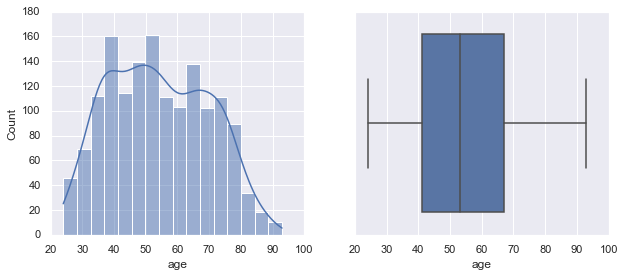

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['age'], kde=True, ax=axes[0])
sns.boxplot(x='age', data=df_1, ax=axes[1])




In [42]:
df_1["age"].describe().T

count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

In [43]:
stats.skew(df_1.age)

0.1396615989084527

In [44]:
data_matrix = [['Statistical Summary','Values'],
              ['count' , 1517.000000],
              ['mean' ,  54.241266],
              ['std', 15.701741],
              ['min' , 24.000000],
              ['25%' , 41.000000],
              ['50%' , 53.000000],
              ['75%' , 67.000000],
              ['max' ,93.000000],
              ['skewness',0.1396615989084527]]
fig = ff.create_table(data_matrix)
fig.show()

**Insight**

* Age : age of voters ranges from a minimum of 24 to maximum of 93.
* The average Age : age of voters is around 54.241266.
* The standard deviation of Age : age of voters is 15.701741.
* 25% , 50% (median) and 75 % of Age : age of voters are 41 , 53 and 67.
* Skewness indicating that the distribution is slightly right skewed.
* Age: age of voters don't  have outliers.

**Note**

As we have only one continuous variable with us and we plot the above the histogram & box-plot for the age variable. For the remaining discrete variables we are going to plot count-plot. 

##### Univariate Analysis of Discrete  Variables.

**PieChart**

A pie chart is a circle divided into sectors that each represent a proportion of the whole. It is often used to show proportion, where the sum of the sectors equal 100%.

**economic_cond_national** - 

Assessment of current national economic conditions, 1 to 5.The participants have assessed several parameters on a scale of 1 to 5. Here, is that 5 stands for a high score, 1 stands for a poor score (for e.g., a participant who gives a score of 5 for the current national economic translates to him/her perceiving the economic conditions to be very good or a  participant who gives a score of 1 for the current national economic translates to him/her perceiving the economic conditions to be very poor).

In [45]:
df_1["economic_cond_national"].value_counts(normalize=True)

3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic_cond_national, dtype: float64

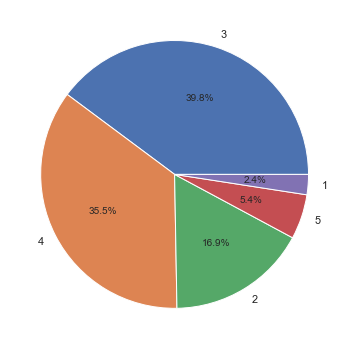

In [46]:
plt.figure(figsize=(10,6))
plt.pie(df_1["economic_cond_national"].value_counts(),labels=df_1["economic_cond_national"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights**

* Most of the participants/voters around (39.8%) gives a score of 3 for the current national economic conditions.
* 36.5% participants/voters gives a score of 4 for the current national economic conditions.
* 16.9% participants/voters gives a score of 2 for the current national economic conditions.
* 5.4% participants/voters gives a score of 5 for the current national economic conditions.
* Only 2.4% participants/voters gives a score of 1 for the current national economic conditions.



**economic_cond_household**

Assessment of current household economic conditions, 1 to 5.The participants/voters have assessed several parameters on a scale of 1 to 5. Here, is that 5 stands for a high score and 1 stands for a poor score (for e.g., a participant/voter who gives a score of 5 for the current household economic translates to him/her perceiving the household economic conditions to be very good or a participant/voter who gives a score of 1 for the current household economic translates to him/her perceiving the household economic conditions to be very poor).


In [47]:
df_1["economic_cond_household"].value_counts(normalize=True)

3    0.425181
4    0.286750
2    0.184575
5    0.060646
1    0.042848
Name: economic_cond_household, dtype: float64

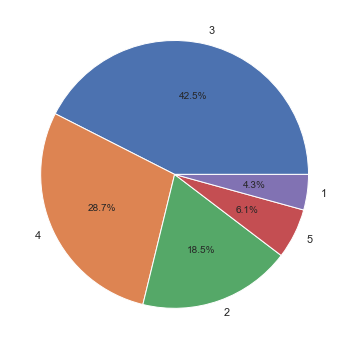

In [48]:
plt.figure(figsize=(10,6))
plt.pie(df_1["economic_cond_household"].value_counts(),labels=df_1["economic_cond_household"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights**

* Most of the participants/voters around (42.5%) gives a score of 3 for the current household economic conditions.
* 28.7% participants/voters gives a score of 4 for the current household economic conditions.
* 18.5% participants/voters gives a score of 2 for the current household economic conditions.
* 6.1% participants/voters gives a score of 5 for the current household economic conditions.
* Only 4.3% participants/voters gives a score of 1 for the current household economic conditions.


**Blair**

Assessment of the Labour leader (Tony Blair - Name for the person contesting for the labour party), 1 to 5.The participants/voters have assessed several parameters on a scale of 1 to 5. Here, is that 5 stands for a highest score and 1 stands for a least score. 

In [49]:
 df_1["Blair"].value_counts(normalize=True)

4    0.549110
2    0.286091
5    0.100198
1    0.063942
3    0.000659
Name: Blair, dtype: float64

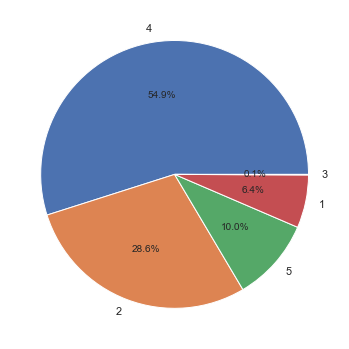

In [50]:
plt.figure(figsize=(10,6))
plt.pie(df_1["Blair"].value_counts(),labels=df_1["Blair"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights**

* Most of the participants/voters around (54.9%) gives a score of 4 to Blair.
* 28.6% of the participants/voters gives a score of 2 to Blair.
* 10% of the participants/voters gives a score of 5 to Blair.
* 6.4% of the participants/voters gives a score of 1 to Blair.
* Only 0.1% of the participants/voters gives a score of 3 to Blair.

**Hague**

Assessment of the Conservative leader ( Hague- Name for the person contesting for the Conservative party), 1 to 5.The participants/voters have assessed several parameters on a scale of 1 to 5. Here, is that 5 stands for a highest score and 1 stands for a least score.

In [51]:
df_1["Hague"].value_counts(normalize=True)

2    0.406724
4    0.367172
1    0.153593
5    0.048121
3    0.024390
Name: Hague, dtype: float64

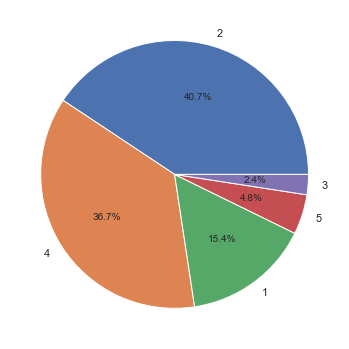

In [52]:
plt.figure(figsize=(10,6))
plt.pie(df_1["Hague"].value_counts(),labels=df_1["Hague"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights**

* Most of the participants/voters around (40.7%) gives a score of 2 to Hague.
* 36.7% of the participants/voters gives a score of 4 to Hague.
* 15.4% of the participants/voters gives a score of 1 to Hague.
* 4.8% of the participants/voters gives a score of 5 to Hague. of the 
* Only 2.8% of the participants/voters gives a score of 1 to Hague.

**Europe**

An 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.As per the data dictionary we know that a 11-point scale that measures Eurosceptic means criticism of the European Union (EU) and European integration and 1 point scale being the opposite of Eurosceptism which is also known as European Unionism.In the europe column 5-6 is considered to be neutral, 1-4 being european unionism and 7-11 being eurosceptic.

In [53]:
df_1["Europe"].value_counts(normalize=True)

11    0.222808
6     0.136454
3     0.084377
4     0.083059
5     0.081081
8     0.073171
9     0.073171
1     0.071852
10    0.066579
7     0.056691
2     0.050758
Name: Europe, dtype: float64

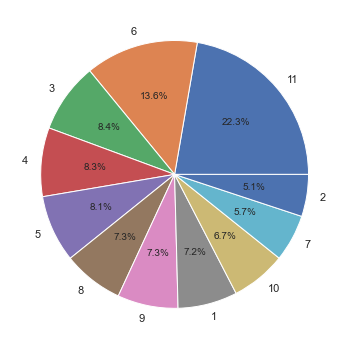

In [54]:
plt.figure(figsize=(10,6))
plt.pie(df_1["Europe"].value_counts(),labels=df_1["Europe"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights**

* 29% of the voters have represent European Unionism sentiments.
* Around 21.7% of the voters are considered to be neutral.
* 49.3% of the voters have represent Eurosceptic sentiment.

**political_knowledge**

knowledge of the voters regarding the  party's position on European integration,0 to 3.

level 0 stands the least, level 3 stands for the highest.

In [55]:
df_1["political_knowledge"].value_counts(normalize=False)

2    776
0    454
3    249
1     38
Name: political_knowledge, dtype: int64

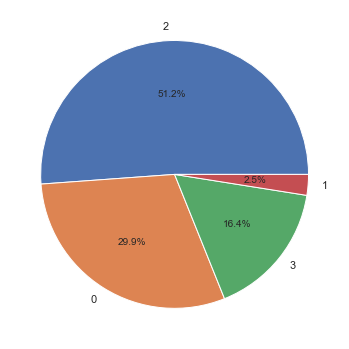

In [56]:
plt.figure(figsize=(10,6))
plt.pie(df_1["political_knowledge"].value_counts(),labels=df_1["political_knowledge"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights**

* 29.9% of the voters have least i.e. (0) political knowledge - (knowledge of the voters regarding the party's position on European integration).
* 16.4% of voters have high i.e(3) political knowledge - (knowledge of the voters regarding the party's position on European integration).
* 51.2% of voters have fair i.e.(2) political knowledge - (knowledge of the voters regarding the party's position on European integration).
* 2.5% of voters have level(1) political knowledge - (knowledge of the voters regarding the party's position on European integration).

##### Univariate Analysis of Categorical Variables.

**vote**

Party choice: Conservative or Labour.

In [57]:
df_1["vote"].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

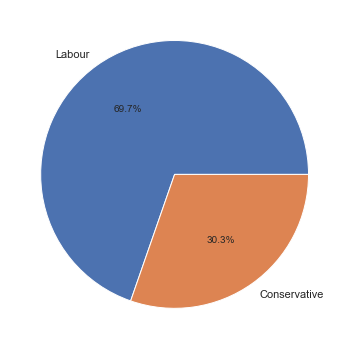

In [58]:
plt.figure(figsize=(10,6))
plt.pie(df_1["vote"].value_counts(),labels=df_1["vote"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights**

* 69.7% of the participants/voters vote for Labour Party.
* 30.3% of the participants/voters vote for Conservative Party.

**gender**

female or male.

In [59]:
df_1["gender"].value_counts(normalize=True)

female    0.53263
male      0.46737
Name: gender, dtype: float64

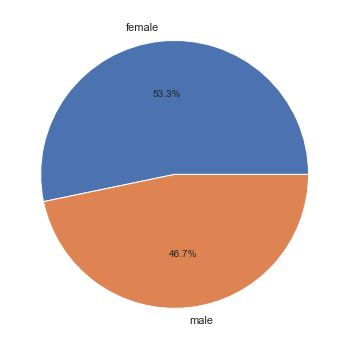

In [60]:
plt.figure(figsize=(10,6))
plt.pie(df_1["gender"].value_counts(),labels=df_1["gender"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights**

* 53.3% of the voters are female.
* 46.7% of the voters are males.

##### Bivariate Analysis

**Scatter Plot**


A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

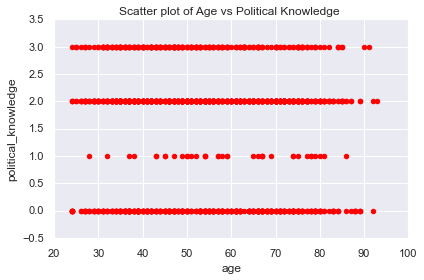

In [61]:
plt.scatter(df_1['age'],df_1['political_knowledge'],color="red")
plt.title("Scatter plot of Age vs Political Knowledge ")
plt.xlabel("age")
plt.ylabel("political_knowledge")
plt.tight_layout()
plt.show()

**Insights**

Their is no such relationship between age & political_knowledge.

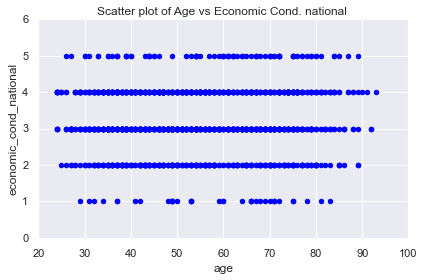

In [62]:
plt.scatter(df_1['age'],df_1['economic_cond_national'],color="blue")
plt.title("Scatter plot of Age vs Economic Cond. national ")
plt.xlabel("age")
plt.ylabel("economic_cond_national")
plt.tight_layout()
plt.show()

**Insights**

Their is no such relationship between age & economic_cond_national.

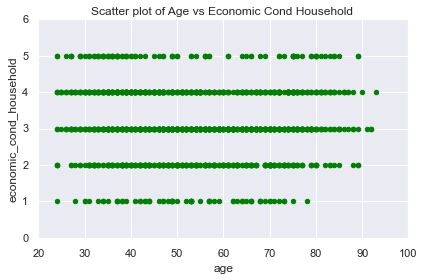

In [63]:
plt.scatter(df_1['age'],df_1['economic_cond_household'],color="green")
plt.title("Scatter plot of Age vs Economic Cond Household ")
plt.xlabel("age")
plt.ylabel("economic_cond_household")
plt.tight_layout()
plt.show()

**Insights**

Their is no such relationship between age & economic_cond_household.

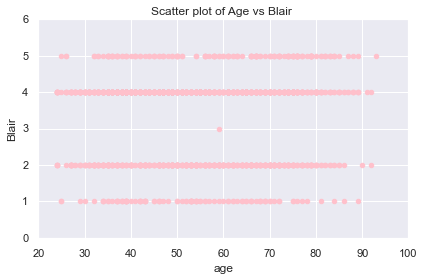

In [64]:
plt.scatter(df_1['age'],df_1['Blair'],color="pink")
plt.title("Scatter plot of Age vs Blair ")
plt.xlabel("age")
plt.ylabel("Blair")
plt.tight_layout()
plt.show()

**Insights**

Their is no such relationship between age & Blair.

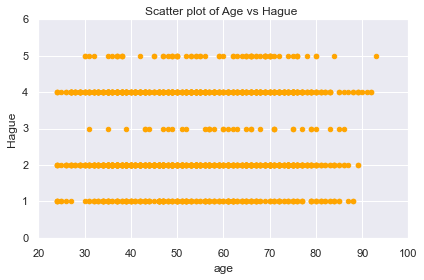

In [65]:
plt.scatter(df_1['age'],df_1['Hague'],color="orange")
plt.title("Scatter plot of Age vs Hague ")
plt.xlabel("age")
plt.ylabel("Hague")
plt.tight_layout()
plt.show()

**Insights**

Their is no such relationship between age & Hague.

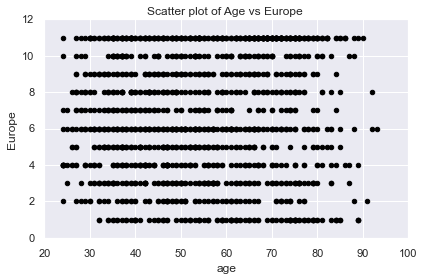

In [66]:
plt.scatter(df_1['age'],df_1['Europe'],color="black")
plt.title("Scatter plot of Age vs Europe ")
plt.xlabel("age")
plt.ylabel("Europe")
plt.tight_layout()
plt.show()

**Insights**

Their is no such relationship between age & Europe.

**Count-plot with Hue**


A count-plot is kind of like a histogram or a bar graph for categorical variables.
Hue :This parameter take column name for colour encoding

<AxesSubplot:xlabel='gender', ylabel='count'>

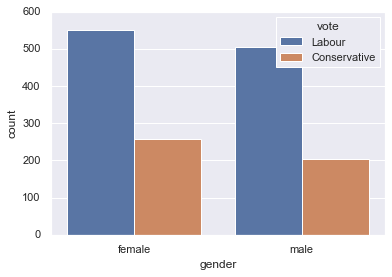

In [67]:
sns.countplot(x='gender', hue='vote', data=df_1)

**Insights**

* Majority of voters female or male  voted  for labour party.
* Female voters are more than as compared to male voters.
* Among female voters majority of voters voted for Labour party & similarly among the male voters majority of voters voted for Labour party.
* Their is less number of voters female or male who voted for conservative party as compared to the labour party.


**Box-plot**

A box-plot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.



<AxesSubplot:xlabel='vote', ylabel='age'>

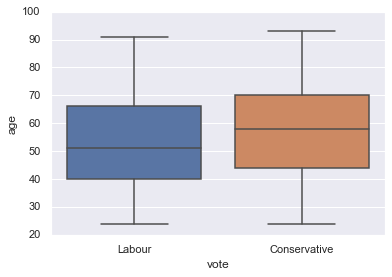

In [68]:
sns.boxplot(x='vote', y='age',data=df_1)

**Insights**

* 50% voters who voted for labour party are in the age level of 48-52.
* 50% voters who voted for conservative party are in the age level of 55-58.
* Median of age of voters who voted for conservative party is more than the labour party.
* It can be easily observed that relatively younger people have voted for “Labour” party in comparison to that of older people who voted for “Conservative” party.

<AxesSubplot:xlabel='economic_cond_national', ylabel='age'>

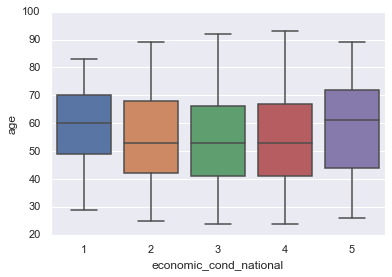

In [69]:
sns.boxplot(x='economic_cond_national', y='age',data=df_1)

**Insights**

* A large proportion of people assess the national economic condition to be average to good (rated 3, 4 and 5), it is interesting to note that the older people in the age range of 50-70 feel that the economic condition is poor.

<AxesSubplot:xlabel='political_knowledge', ylabel='age'>

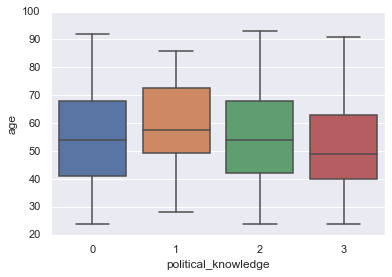

In [70]:
sns.boxplot(x='political_knowledge', y='age',data=df_1)

**Insights**

* There is an evenly distributed number of people when it comes to thier political knowledge about their party's position on European integration.


<AxesSubplot:xlabel='Europe', ylabel='vote'>

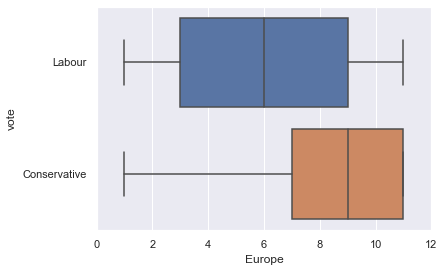

In [71]:
sns.boxplot(x='Europe', y='vote',data=df_1)

**Insights**

* Distribution is larger for the Labour party as compared the Conservative party.
* Majority of people with ‘Eurosceptic’ sentiment  voted for “Labour” party.

##### Multivariate Analysis

**Heatmap**

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.Darker Shades have higher Correlation , while lighter shades have smaller values of Correlation as compared to darker shades values.Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.



**Checking for Correlations**

In [72]:
df_1.corr()

age  economic_cond_national  \
age                      1.000000                0.018687   
economic_cond_national   0.018687                1.000000   
economic_cond_household -0.038868                0.347687   
Blair                    0.032084                0.326141   
Hague                    0.031144               -0.200790   
Europe                   0.064562               -0.209150   
political_knowledge     -0.046598               -0.023510   

                         economic_cond_household     Blair     Hague  \
age                                    -0.038868  0.032084  0.031144   
economic_cond_national                  0.347687  0.326141 -0.200790   
economic_cond_household                 1.000000  0.215822 -0.100392   
Blair                                   0.215822  1.000000 -0.243508   
Hague                                  -0.100392 -0.243508  1.000000   
Europe                                 -0.112897 -0.295944  0.285738   
political_knowledge                    -0.038528 -0.021299 -0.029906   

                           Europe  political_knowledge  
age                      0.064562            -0.046598  
economic_cond_national  -0.209150            -0.023510  
economic_cond_household -0.112897            -0.038528  
Blair                   -0.295944            -0.021299  
Hague                    0.285738            -0.029906  
Europe                   1.000000            -0.151197  
political_knowledge     -0.151197             1.000000

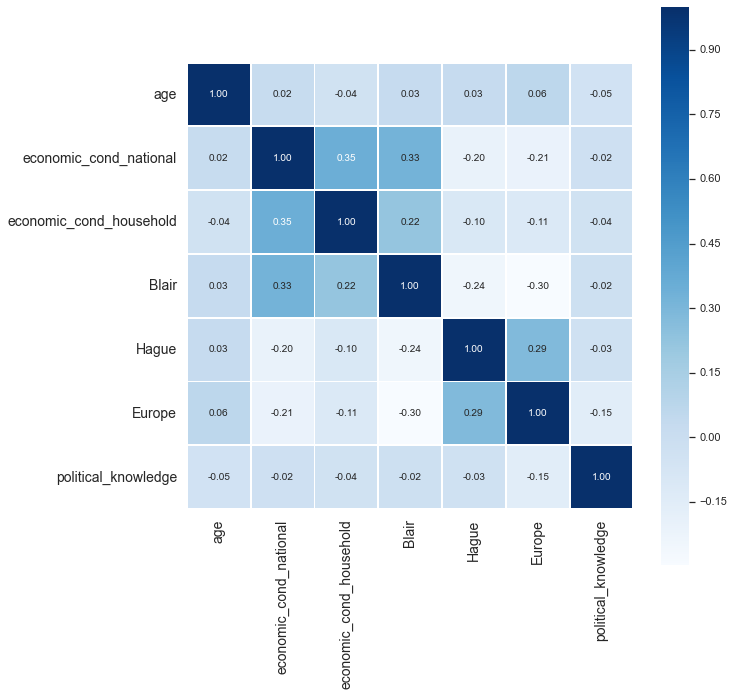

In [73]:
corr=df_1.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr,annot=True,cmap="Blues",linewidth=0.85,square=True,annot_kws={"size":10.10},fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(size=14)
plt.show()

**Insights**


* economic_cond_national with economic_cond_household shows max correlation i.e.0.35 , but the correlation is weak. 
* economic_cond_national with Blair shows weak correlation i.e.0.33.
* economic_cond_household with Blair shows weak correlation i.e.0.22.
* economic_cond_national with Hague & Europe shows poorest correlation i.e.-0.20,-0.21.

Note: Their is no such relationship between the variables , hence their is no problem of multicollinearity in the dataset.

**Pairplot**

Pairplot shows the relationship between the variables in the form of scatter-plot and the distribution of the variable in the form of histogram.

<Figure size 720x720 with 0 Axes>

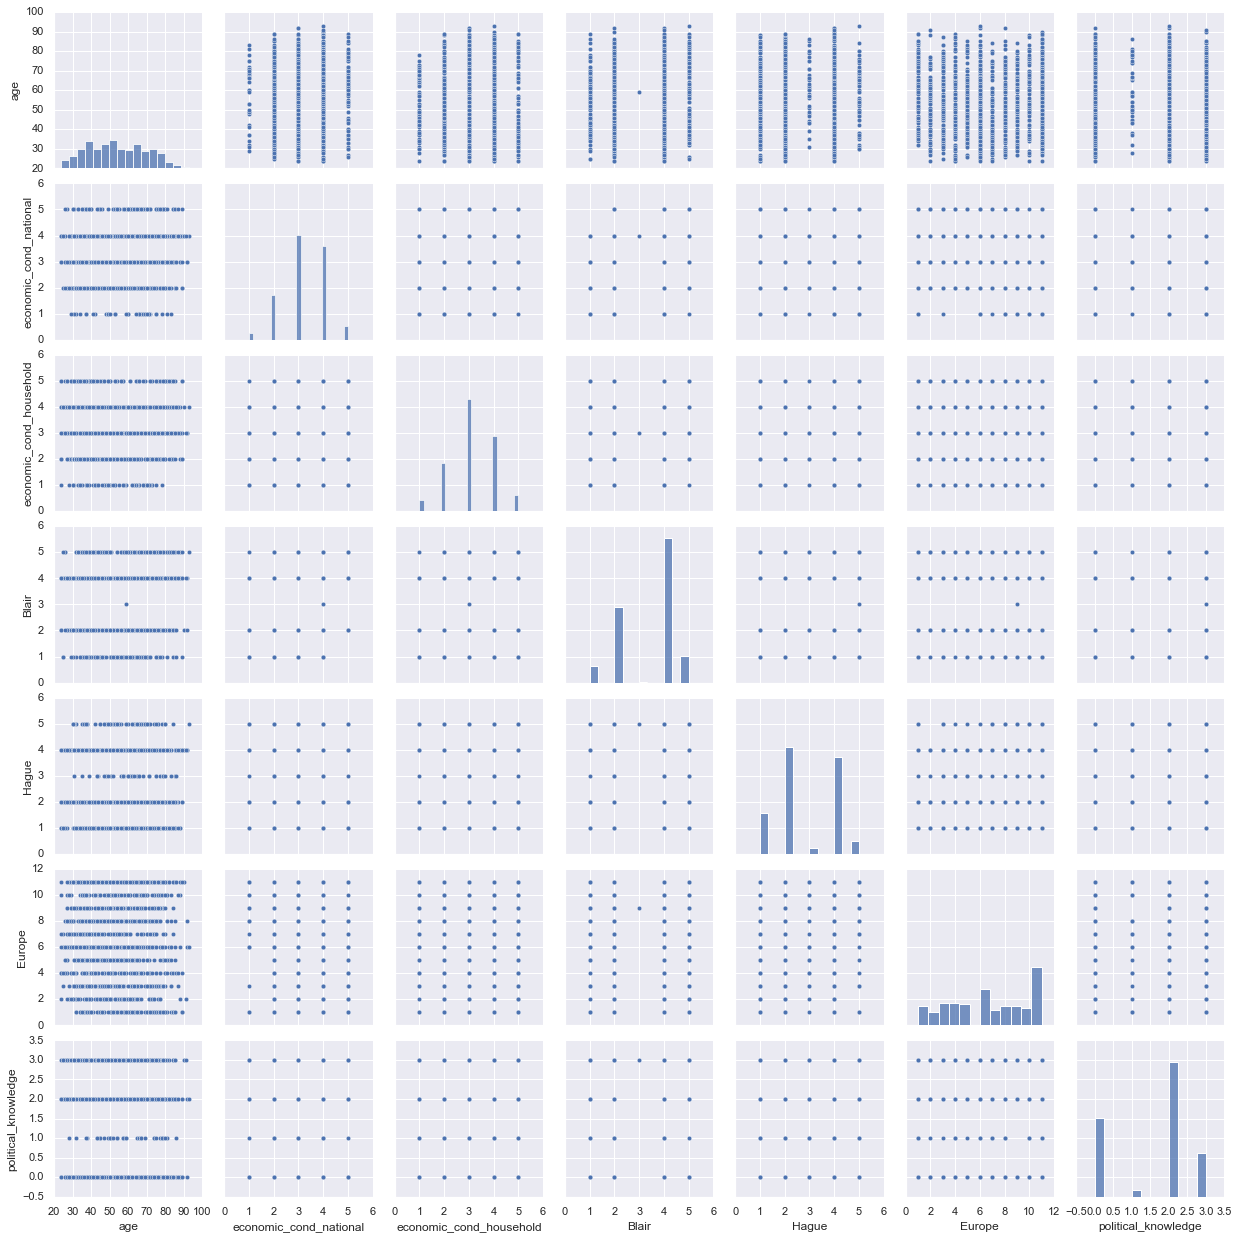

In [74]:
plt.figure(figsize=(10,10)) 
sns.pairplot(df_1)
plt.show()

**Insights**

Their is no such relationship between the given features in the dataset.

##### Checking for Outliers in the dataset.

To check for outliers, we will be plotting the box plots.

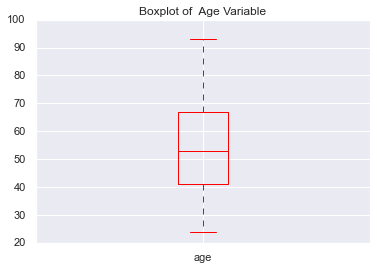

In [74]:
df_1.boxplot(column=['age'],color="red")
plt.title("Boxplot of  Age Variable")
plt.show()

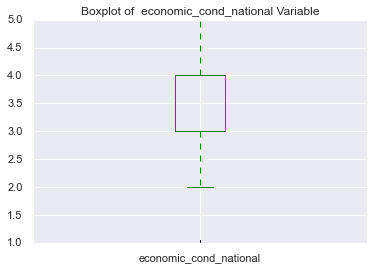

In [75]:
df_1.boxplot(column=['economic_cond_national'],color="green")
plt.title("Boxplot of  economic_cond_national Variable")
plt.show()

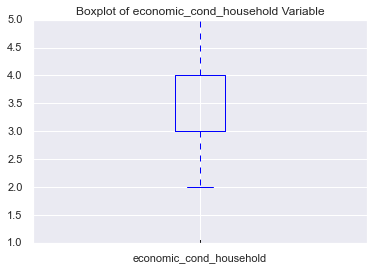

In [76]:
df_1.boxplot(column=['economic_cond_household'],color="blue")
plt.title("Boxplot of economic_cond_household Variable")
plt.show()

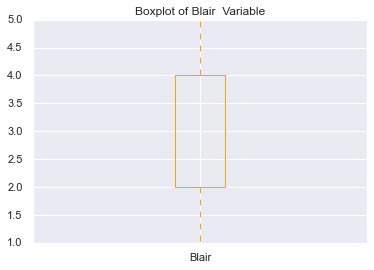

In [77]:
df_1.boxplot(column=['Blair'],color="orange")
plt.title("Boxplot of Blair  Variable")
plt.show()

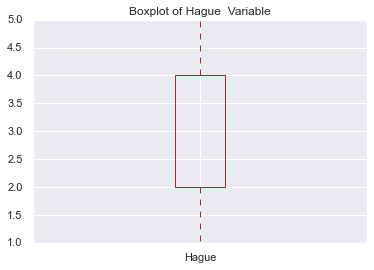

In [78]:
df_1.boxplot(column=['Hague'],color="brown")
plt.title("Boxplot of Hague  Variable")
plt.show()

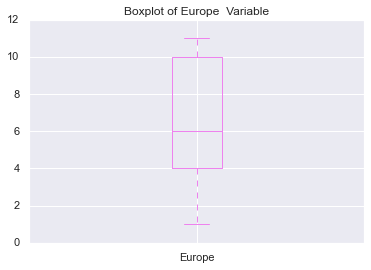

In [79]:
df_1.boxplot(column=['Europe'],color="violet")
plt.title("Boxplot of Europe  Variable")
plt.show()

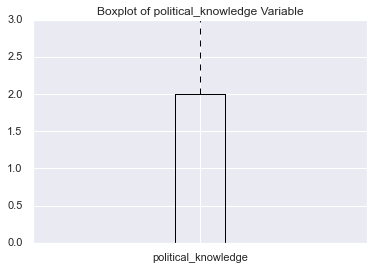

In [80]:
df_1.boxplot(column=['political_knowledge'],color="black")
plt.title("Boxplot of political_knowledge Variable")
plt.show()

**Insights**

From the above plotted boxplots we clearly infer that their is no outliers present in the dataset.

#### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

##### Encoding

In [81]:
df_1.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [82]:
for feature in df_1.columns: 
    if df_1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_1[feature].unique()))
        print(pd.Categorical(df_1[feature].unique()).codes)
        df_1[feature] = pd.Categorical(df_1[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [83]:
encode_check_table = [['S.No.','vote','Encode'],
              [1,'Labour' ,1],
              [2,'Conservative',0]]
fig = ff.create_table(encode_check_table)
fig.show()

In [84]:
gender_encode_table = [['Sr.No.', 'Gender','Encode'],
                    [1, 'Female',0],[2, 'Male',1]]
gender_encode_table = ff.create_table(gender_encode_table)
gender_encode_table

**Checking the Head of the Dataset after Encoding**

In [85]:
df_1.head(5)

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender  
0       2                    2       0  
1       5                    2       1  
2       3                    2       1  
3       4                    0       0  
4       6                    2       1

##### Scaling

* As we know that scaling means that we're transforming our data so that it fits within a specific scale, like 0-100 or 0-1.

* Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data preprocessing to handle highly varying magnitudes or values or units. By looking at the dataset

* Here in the given dataset we have only one continuous variable i.e. age rest variables are discrete ordinal in nature having a specific range.As we know that we perform scaling when we have more than 1 continuous variable to handle varying magnitudes or values or units.Moreover their is no outliers present in the given dataset too. So scaling in the given dataset isn't so much effective.

* Here in the given problem we need to build model like K-nearest neighbors (KNN) with a Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally for specific KNN model.So we will perform the scaling only for those models / algorithms for which scaling is a prerequisite , but here we donnot need scaling as all are discrte variables.

##### Train , Test & Split

**Proportion of 1s and 0s**

In [87]:
df_1.vote.value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

There is no issue of class imbalance here , as we have reasonable proportions in both the classes.

**Extracting the target column into separate vectors for training set and test set.**

In [88]:
X = df_1.drop("vote", axis=1)

y = df_1.pop("vote")

**Splitting data into training and test set**

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels,test_labels = train_test_split(X, y, test_size=.30, random_state=1)

**Checking the dimensions of the training and test data.**

In [90]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (1061, 8)
X_test (456, 8)
train_labels (1061,)
test_labels (456,)


#### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

##### Logistic Regression Model

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

In [91]:
model = LogisticRegression()
model.fit(X_train, train_labels)

LogisticRegression()

**Predicting on Training and Test dataset**

In [92]:
lr_ytrain_predict =model.predict(X_train)
lr_ytest_predict = model.predict(X_test)

In [93]:
lr_ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [94]:
lr_ytest_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

**Getting the Predicted Probability For Train & Test Data**

In [95]:
lr_ytrain_predict_prob=model.predict_proba(X_train)
lr_ytrain_predict_prob
pd.DataFrame(lr_ytrain_predict_prob).head()

0         1
0  0.929415  0.070585
1  0.096428  0.903572
2  0.296155  0.703845
3  0.111361  0.888639
4  0.016040  0.983960

In [96]:
lr_ytest_predict_prob=model.predict_proba(X_test)
lr_ytest_predict_prob
pd.DataFrame(lr_ytest_predict_prob).head()

0         1
0  0.427092  0.572908
1  0.144547  0.855453
2  0.005856  0.994144
3  0.845964  0.154036
4  0.059527  0.940473

##### Model Evaluation-Logistic Regression

**AUC and ROC for the Training Data**

AUC: 0.890


Text(0, 0.5, 'True Positive Rate')

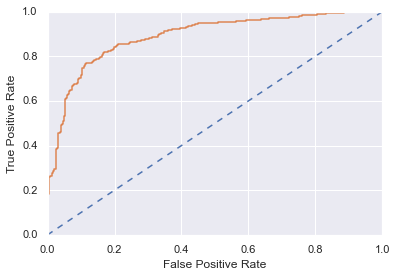

In [97]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [98]:
lr_confusion_matrix_train=confusion_matrix(train_labels, lr_ytrain_predict)
lr_confusion_matrix_train

array([[200, 107],
       [ 66, 688]])

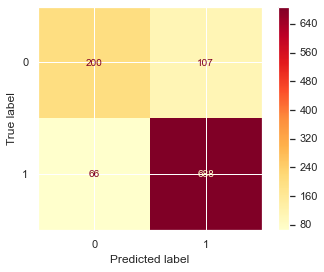

In [99]:
plot_confusion_matrix(model,X_train,train_labels,colorbar=True,cmap='YlOrRd')

**Train Data Accuracy**

In [112]:
lr_train_acc=model.score(X_train,train_labels)
lr_train_acc

0.8369462770970783

**Classification Report of Training Data**

In [101]:
print(classification_report(train_labels, lr_ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [102]:
lr_metrics=classification_report(train_labels, lr_ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["0"][2],2)
lr_train_recall=round(df.loc["0"][1],2)
lr_train_precision=round(df.loc["0"][0],2)
print ('lr_train_precision',lr_train_precision)
print ('lr_train_recall',lr_train_recall)
print ('lr_train_f1',lr_train_f1)

lr_train_precision 0.75
lr_train_recall 0.65
lr_train_f1 0.7


**Train Data - Precision,Recall & f1 score of class 1**

In [103]:
lr_metrics=classification_report(train_labels, lr_ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.87
lr_train_recall  0.91
lr_train_f1  0.89


**AUC and ROC for the Test Data**

AUC: 0.877


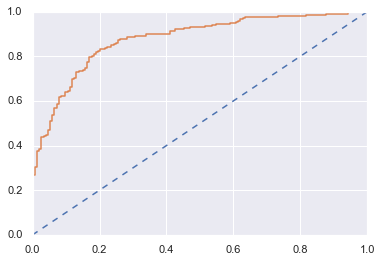

In [104]:
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

**Confusion Matrix for Test Data**

In [105]:
lr_confusion_matrix_test=confusion_matrix(test_labels, lr_ytest_predict)
lr_confusion_matrix_test

array([[110,  43],
       [ 37, 266]])

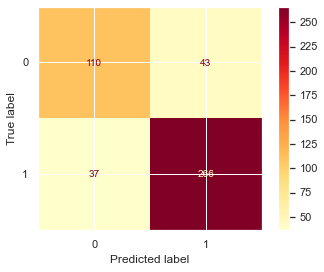

In [107]:
plot_confusion_matrix(model,X_test,test_labels,colorbar=True,cmap='YlOrRd')

**Test Data Accuracy**

In [108]:
lr_test_acc=model.score(X_test,test_labels)
lr_test_acc

0.8245614035087719

**Classifiaction Report of Test Data**

In [109]:
print(classification_report(test_labels, lr_ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



**Test Data - Precision,Recall & f1 score of class 0**

In [110]:
lr_metrics=classification_report(test_labels, lr_ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(df.loc["0"][0],2)
lr_test_recall=round(df.loc["0"][1],2)
lr_test_f1=round(df.loc["0"][2],2)
print ('lr_test_precision',lr_test_precision)
print ('lr_test_recall',lr_test_recall)
print ('lr_test_f1',lr_test_f1)


lr_test_precision 0.75
lr_test_recall 0.72
lr_test_f1 0.73


**Test Data - Precision,Recall & f1 score of class 1**

In [111]:
lr_metrics=classification_report(test_labels, lr_ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)


lr_test_precision  0.86
lr_test_recall  0.88
lr_test_f1  0.87


#####  Conclusion Logistic Regression Model :

**Train Data Class 0:**

* AUC: 89%
* Accuracy: 84%
* Precision: 75%
* Recall: 65%
* f1-Score: 70%

**Train Data Class 1:**

* AUC: 89%
* Accuracy: 84%
* Precision: 87%
* Recall: 91%
* f1-Score: 89%


**Test Data Class 0:**

* AUC: 87.7%
* Accuracy: 82%
* Precision: 75%
* Recall: 72%
* f1-Score: 73%



**Test Data Class 1:**

* AUC: 87.7%
* Accuracy: 82%
* Precision: 86%
* Recall: 88%
* f1-Score: 87%




##### LDA Model

In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,train_labels)

**Predicting the Training and Testing data**

In [114]:
lda_ytrain_predict = model.predict(X_train)
lda_ytest_predict = model.predict(X_test)

In [115]:
lda_ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [116]:
lda_ytest_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

**Getting the Predicted Probability**

In [117]:
lda_ytrain_predict
lda_ytrain_predict_prob=model.predict_proba(X_train)
lda_ytrain_predict_prob
pd.DataFrame(lda_ytrain_predict_prob).head()

0         1
0  0.949216  0.050784
1  0.078241  0.921759
2  0.307389  0.692611
3  0.078963  0.921037
4  0.012161  0.987839

In [118]:
lda_ytest_predict
lda_ytest_predict_prob=model.predict_proba(X_test)
lda_ytest_predict_prob
pd.DataFrame(lda_ytest_predict_prob).head()

0         1
0  0.462093  0.537907
1  0.133955  0.866045
2  0.006414  0.993586
3  0.861210  0.138790
4  0.056545  0.943455

##### Model Evaluation - LDA Model

**AUC and ROC for the Training Data**

AUC: 0.889


Text(0, 0.5, 'True Positive Rate')

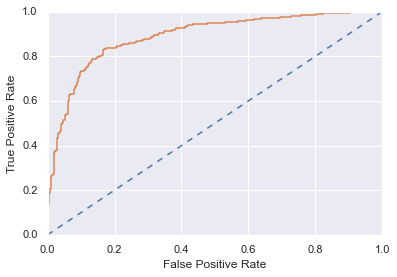

In [119]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [120]:
lda_confusion_matrix_train=confusion_matrix(train_labels, lda_ytrain_predict)
lda_confusion_matrix_train

array([[200, 107],
       [ 69, 685]])

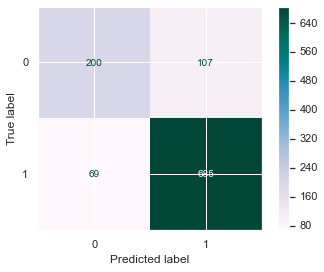

In [121]:
plot_confusion_matrix(model,X_train,train_labels,colorbar=True,cmap='PuBuGn')

**Train Data Accuracy**

In [122]:
lda_train_acc=model.score(X_train,train_labels)
lda_train_acc

0.8341187558906692

**Classification Report of Train Data**

In [123]:
print(classification_report(train_labels, lda_ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [124]:
lda_metrics=classification_report(train_labels, lda_ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["0"][2],2)
lda_train_recall=round(df.loc["0"][1],2)
lda_train_precision=round(df.loc["0"][0],2)
print ('lda_train_precision',lda_train_precision)
print ('lda_train_recall',lda_train_recall)
print ('lda_train_f1',lda_train_f1)

lda_train_precision 0.74
lda_train_recall 0.65
lda_train_f1 0.69


**Train Data - Precision,Recall & f1 score of class 1**

In [125]:
lda_metrics=classification_report(train_labels, lda_ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision',lda_train_precision)
print ('lda_train_recall',lda_train_recall)
print ('lda_train_f1',lda_train_f1)

lda_train_precision 0.86
lda_train_recall 0.91
lda_train_f1 0.89


**AUC and ROC for the Test Data**

AUC: 0.888


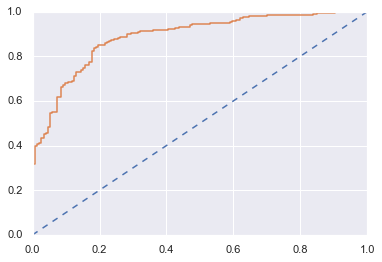

In [126]:
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

**Confusion Matrix for Test Data**

In [127]:
lda_confusion_matrix_test=confusion_matrix(test_labels, lda_ytest_predict)
lda_confusion_matrix_test

array([[111,  42],
       [ 34, 269]])

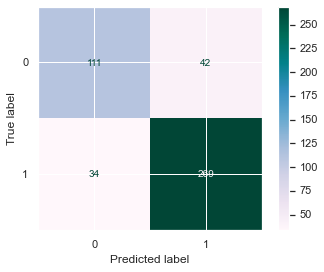

In [128]:
plot_confusion_matrix(model,X_test,test_labels,colorbar=True,cmap='PuBuGn')

**Test Data Accuracy**

In [129]:
lda_test_acc=model.score(X_test,test_labels)
lda_test_acc

0.8333333333333334

**Classifiaction Report of Test Data**

In [130]:
print(classification_report(test_labels, lda_ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



**Test Data - Precision,Recall & f1 score of class 0**

In [131]:
lda_metrics=classification_report(test_labels, lda_ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["0"][0],2)
lda_test_recall=round(df.loc["0"][1],2)
lda_test_f1=round(df.loc["0"][2],2)
print ('lda_test_precision',lda_test_precision)
print ('lda_test_recall',lda_test_recall)
print ('lda_test_f1',lda_test_f1)



lda_test_precision 0.77
lda_test_recall 0.73
lda_test_f1 0.74


**Test Data - Precision,Recall & f1 score of class 1**

In [132]:
lda_metrics=classification_report(test_labels, lda_ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision',lda_test_precision)
print ('lda_test_recall',lda_test_recall)
print ('lda_test_f1',lda_test_f1)

lda_test_precision 0.86
lda_test_recall 0.89
lda_test_f1 0.88


##### Conclusion LDA Model :

**Train Data Class 0:**

* AUC: 88.9%
* Accuracy: 83%
* Precision: 74%
* Recall: 65%
* f1-Score: 69%

**Train Data Class 1:**

* AUC: 88.9%
* Accuracy: 83%
* Precision: 86%
* Recall: 91%
* f1-Score: 89%



**Test Data Class 0:**

* AUC: 88.8%
* Accuracy: 83%
* Precision: 77%
* Recall: 73%
* f1-Score: 74%




**Test Data Class 1:**

* AUC: 88.8%
* Accuracy: 83%
* Precision: 86%
* Recall: 89%
* f1-Score: 88%




#### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. 

##### KNN Model

In [133]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,train_labels)

KNeighborsClassifier()

**Predicting the Training and Testing data**

In [134]:
knn_ytrain_predict = KNN_model.predict(X_train)
knn_ytest_predict = KNN_model.predict(X_test)

In [135]:
knn_ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [136]:
knn_ytest_predict

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

**Getting the Predicted Probability**

In [137]:
knn_ytrain_predict
knn_ytrain_predict_prob=KNN_model.predict_proba(X_train)
knn_ytrain_predict_prob
pd.DataFrame(knn_ytrain_predict_prob).head()

0    1
0  0.8  0.2
1  0.0  1.0
2  0.4  0.6
3  0.2  0.8
4  0.0  1.0

In [138]:
knn_ytest_predict
knn_ytest_predict_prob=KNN_model.predict_proba(X_test)
knn_ytest_predict_prob
pd.DataFrame(knn_ytest_predict_prob).head()

0    1
0  0.6  0.4
1  0.4  0.6
2  0.2  0.8
3  0.4  0.6
4  0.0  1.0

##### Model Evaluation - KNN Model

**AUC and ROC for the Training Data**

AUC: 0.923


Text(0, 0.5, 'True Positive Rate')

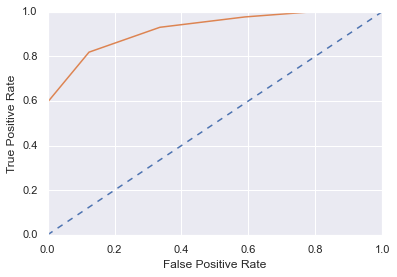

In [139]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
knn_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [140]:
knn_confusion_matrix_train=confusion_matrix(train_labels, knn_ytrain_predict)
knn_confusion_matrix_train

array([[204, 103],
       [ 53, 701]])

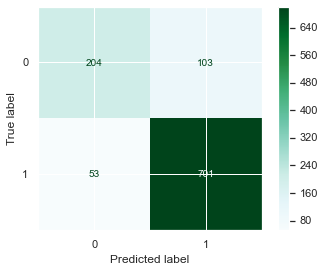

In [141]:
plot_confusion_matrix(KNN_model,X_train,train_labels,colorbar=True,cmap='BuGn')

**Train Data Accuracy**

In [142]:
knn_train_acc=KNN_model.score(X_train,train_labels)
knn_train_acc

0.8529688972667295

**Classification Report of Train Data**

In [143]:
print(classification_report(train_labels, knn_ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [144]:
knn_metrics=classification_report(train_labels, knn_ytrain_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_f1=round(df.loc["0"][2],2)
knn_train_recall=round(df.loc["0"][1],2)
knn_train_precision=round(df.loc["0"][0],2)
print ('knn_train_precision',knn_train_precision)
print ('knn_train_recall',knn_train_recall)
print ('knn_train_f1',knn_train_f1)

knn_train_precision 0.79
knn_train_recall 0.66
knn_train_f1 0.72


**Train Data - Precision,Recall & f1 score of class 1**

In [145]:
knn_metrics=classification_report(train_labels, knn_ytrain_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_f1=round(df.loc["1"][2],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_precision=round(df.loc["1"][0],2)
print ('knn_train_precision',knn_train_precision)
print ('knn_train_recall',knn_train_recall)
print ('knn_train_f1',knn_train_f1)

knn_train_precision 0.87
knn_train_recall 0.93
knn_train_f1 0.9


**AUC and ROC for the Test Data**

AUC: 0.852


Text(0, 0.5, 'True Positive Rate')

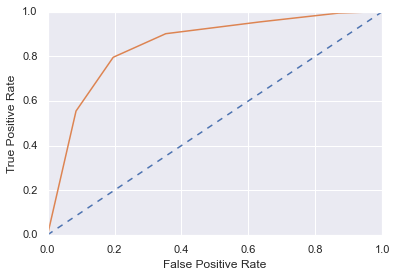

In [146]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
knn_train_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for Test Data**

In [147]:
knn_confusion_matrix_test=confusion_matrix(test_labels, knn_ytest_predict)
knn_confusion_matrix_test

array([[ 99,  54],
       [ 30, 273]])

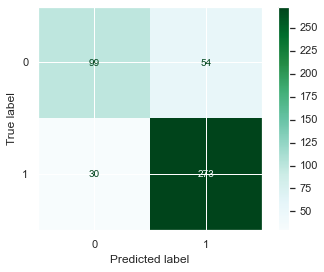

In [148]:
plot_confusion_matrix(KNN_model,X_test,test_labels,colorbar=True,cmap='BuGn')

**Test Data Accuracy**

In [149]:
knn_test_acc=KNN_model.score(X_test,test_labels)
knn_test_acc

0.8157894736842105

**Classifiaction Report of Test Data**

In [150]:
print(classification_report(test_labels, knn_ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



**Test Data - Precision,Recall & f1 score of class 0**

In [151]:
knn_metrics=classification_report(test_labels, knn_ytest_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["0"][0],2)
knn_test_recall=round(df.loc["0"][1],2)
knn_test_f1=round(df.loc["0"][2],2)
print ('knn_test_precision',knn_test_precision)
print ('knn_test_recall',knn_test_recall)
print ('knn_test_f1',knn_test_f1)

knn_test_precision 0.77
knn_test_recall 0.65
knn_test_f1 0.7


**Test Data - Precision,Recall & f1 score of class 1**

In [152]:
knn_metrics=classification_report(test_labels, knn_ytest_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('knn_test_precision',knn_test_precision)
print ('knn_test_recall',knn_test_recall)
print ('knn_test_f1',knn_test_f1)

knn_test_precision 0.83
knn_test_recall 0.9
knn_test_f1 0.87


##### Conclusion KNN Model :

**Train Data Class 0:**

* AUC: 92.3%
* Accuracy: 85%
* Precision: 79%
* Recall: 66%
* f1-Score: 72%

**Train Data Class 1:**

* AUC: 92.3%
* Accuracy: 85%
* Precision: 87%
* Recall: 93%
* f1-Score: 90%

**Test Data Class 0:**

* AUC: 85.2%
* Accuracy: 82%
* Precision: 77%
* Recall: 65%
* f1-Score: 70%

**Test Data Class 1:**

* AUC: 85.2%
* Accuracy: 82%
* Precision: 83%
* Recall: 90%
* f1-Score: 87%

##### Gaussian Naive Bayes

In [153]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_model = GaussianNB()
NB_model.fit(X_train,train_labels)

GaussianNB()

**Predicting the Training and Testing data**

In [154]:
nb_ytrain_predict = NB_model.predict(X_train)
nb_ytest_predict = NB_model.predict(X_test)

In [155]:
nb_ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [156]:
nb_ytest_predict

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

**Getting the Predicted Probability**

In [157]:
nb_ytrain_predict
nb_ytrain_predict_prob=NB_model.predict_proba(X_train)
nb_ytrain_predict_prob
pd.DataFrame(nb_ytrain_predict_prob).head()

0         1
0  0.984678  0.015322
1  0.065437  0.934563
2  0.271735  0.728265
3  0.080026  0.919974
4  0.007648  0.992352

In [158]:
nb_ytest_predict
nb_ytest_predict_prob=NB_model.predict_proba(X_test)
nb_ytest_predict_prob
pd.DataFrame(nb_ytest_predict_prob).head()

0         1
0  0.536792  0.463208
1  0.120285  0.879715
2  0.000332  0.999668
3  0.945240  0.054760
4  0.039267  0.960733

##### Model Evaluation - Gaussian Naive Bayes Model

**AUC and ROC for the Training Data**

AUC: 0.888


Text(0, 0.5, 'True Positive Rate')

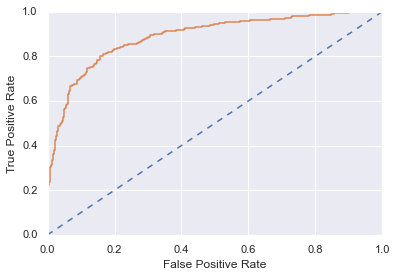

In [159]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
nb_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [160]:
nb_confusion_matrix_train=confusion_matrix(train_labels, nb_ytrain_predict)
nb_confusion_matrix_train

array([[211,  96],
       [ 79, 675]])

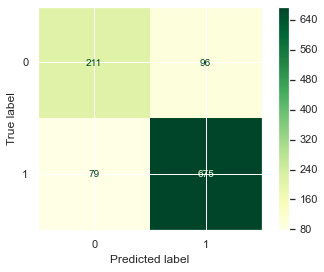

In [162]:
plot_confusion_matrix(NB_model,X_train,train_labels,colorbar=True,cmap='YlGn')

**Train Data Accuracy**

In [163]:
nb_train_acc=NB_model.score(X_train,train_labels)
nb_train_acc

0.8350612629594723

**Classification Report of Train Data**

In [164]:
print(classification_report(train_labels, nb_ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [165]:
nb_metrics=classification_report(train_labels, nb_ytrain_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_f1=round(df.loc["0"][2],2)
nb_train_recall=round(df.loc["0"][1],2)
nb_train_precision=round(df.loc["0"][0],2)
print ('nb_train_precision',nb_train_precision)
print ('nb_train_recall',nb_train_recall)
print ('nb_train_f1',nb_train_f1)

nb_train_precision 0.73
nb_train_recall 0.69
nb_train_f1 0.71


**Train Data - Precision,Recall & f1 score of class 1**

In [166]:
nb_metrics=classification_report(train_labels, nb_ytrain_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_f1=round(df.loc["1"][2],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_precision=round(df.loc["1"][0],2)
print ('nb_train_precision',nb_train_precision)
print ('nb_train_recall',nb_train_recall)
print ('nb_train_f1',nb_train_f1)

nb_train_precision 0.88
nb_train_recall 0.9
nb_train_f1 0.89


**AUC and ROC for the Test Data**

AUC: 0.876


Text(0, 0.5, 'True Positive Rate')

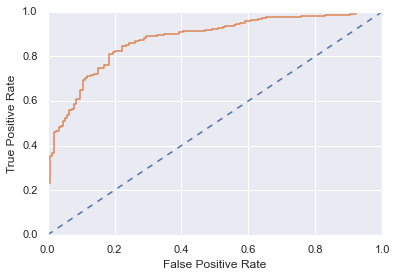

In [167]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
nb_train_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Test Data**

In [168]:
nb_confusion_matrix_test=confusion_matrix(test_labels, nb_ytest_predict)
nb_confusion_matrix_test

array([[112,  41],
       [ 40, 263]])

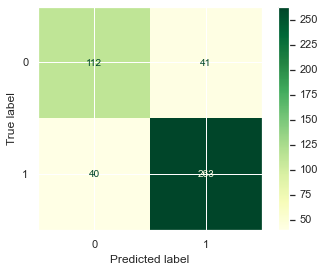

In [169]:
plot_confusion_matrix(NB_model,X_test,test_labels,colorbar=True,cmap='YlGn')

**Test Data Accuracy**

In [170]:
nb_train_acc=NB_model.score(X_test,test_labels)
nb_train_acc

0.8223684210526315

**Classification Report of Test Data**

In [171]:
print(classification_report(test_labels, nb_ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



**Test Data - Precision,Recall & f1 score of class 0**

In [172]:
nb_metrics=classification_report(test_labels, nb_ytest_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_f1=round(df.loc["0"][2],2)
nb_test_recall=round(df.loc["0"][1],2)
nb_test_precision=round(df.loc["0"][0],2)
print ('nb_test_precision',nb_test_precision)
print ('nb_test_recall',nb_test_recall)
print ('nb_test_f1',nb_test_f1)

nb_test_precision 0.74
nb_test_recall 0.73
nb_test_f1 0.73


**Test Data - Precision,Recall & f1 score of class 1**

In [173]:
nb_metrics=classification_report(test_labels, nb_ytest_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_f1=round(df.loc["1"][2],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_precision=round(df.loc["1"][0],2)
print ('nb_test_precision',nb_test_precision)
print ('nb_test_recall',nb_test_recall)
print ('nb_test_f1',nb_test_f1)

nb_test_precision 0.87
nb_test_recall 0.87
nb_test_f1 0.87


##### Conclusion Gaussian Naive Bayes Model :

**Train Data Class 0:**

* AUC: 88.8%
* Accuracy: 84%
* Precision: 73%
* Recall: 69%
* f1-Score: 71%

**Train Data Class 1:**

* AUC: 88.8%
* Accuracy: 84%
* Precision: 88%
* Recall: 90%
* f1-Score: 89%

**Test Data Class 0:**

* AUC: 87.6%
* Accuracy: 82%
* Precision: 74%
* Recall: 73%
* f1-Score: 73%

**Test Data Class 1:**

* AUC: 87.6%
* Accuracy: 82%
* Precision: 87%
* Recall: 87%
* f1-Score: 87%

#### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

##### Random Forest Base Model

In [174]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, train_labels)
rfcl

RandomForestClassifier()

**Variable Importance**

In [176]:
print(
    pd.DataFrame(rfcl.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                              Imp
age                      0.213364
Europe                   0.191816
Hague                    0.174736
Blair                    0.138352
economic_cond_national   0.092993
economic_cond_household  0.080528
political_knowledge      0.073670
gender                   0.034541


**Predicting on Training and Test dataset**

In [177]:
rf_ytrain_predict = rfcl.predict(X_train)
rf_ytest_predict = rfcl.predict(X_test)

In [178]:
rf_ytrain_predict

array([0, 1, 0, ..., 1, 1, 1], dtype=int8)

In [179]:
rf_ytest_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

**Getting the Predicted Probability**

In [180]:
rf_ytrain_predict_prob=rfcl.predict_proba(X_train)
rf_ytrain_predict_prob
pd.DataFrame(rf_ytrain_predict_prob).head()

0     1
0  0.95  0.05
1  0.06  0.94
2  0.71  0.29
3  0.03  0.97
4  0.02  0.98

In [181]:
rf_ytest_predict_prob=rfcl.predict_proba(X_test)
rf_ytest_predict_prob
pd.DataFrame(rf_ytest_predict_prob).head()

0     1
0  0.72  0.28
1  0.31  0.69
2  0.01  0.99
3  0.79  0.21
4  0.09  0.91

##### Model Evaluation - Random Forest Base Model

**AUC and ROC for the Training Data**

AUC: 1.000


Text(0, 0.5, 'True Positive Rate')

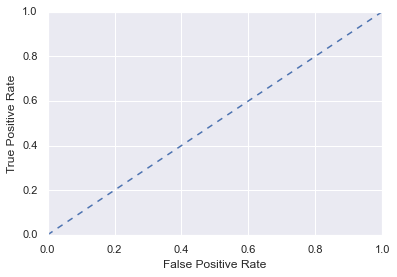

In [182]:
# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
rf_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [184]:
rf_confusion_matrix_train=confusion_matrix(train_labels, rf_ytrain_predict)
rf_confusion_matrix_train

array([[307,   0],
       [  0, 754]])

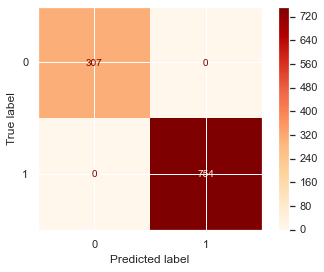

In [185]:
plot_confusion_matrix(rfcl,X_train,train_labels,colorbar=True,cmap='OrRd')

**Train Data Accuracy**

In [186]:
rf_train_acc=rfcl.score(X_train,train_labels)
rf_train_acc

1.0

**Classification Report of Training Data**

In [187]:
print(classification_report(train_labels, rf_ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [188]:
rf_metrics=classification_report(train_labels, rf_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(df.loc["0"][2],2)
rf_train_recall=round(df.loc["0"][1],2)
rf_train_precision=round(df.loc["0"][0],2)
print ('rf_train_precision',rf_train_precision)
print ('rf_train_recall',rf_train_recall)
print ('rf_train_f1',rf_train_f1)

rf_train_precision 1.0
rf_train_recall 1.0
rf_train_f1 1.0


**Train Data - Precision,Recall & f1 score of class 1**

In [189]:
rf_metrics=classification_report(train_labels, rf_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(df.loc["1"][2],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_precision=round(df.loc["1"][0],2)
print ('rf_train_precision',rf_train_precision)
print ('rf_train_recall',rf_train_recall)
print ('rf_train_f1',rf_train_f1)

rf_train_precision 1.0
rf_train_recall 1.0
rf_train_f1 1.0


**AUC and ROC for the Test Data**

AUC: 0.892


Text(0, 0.5, 'True Positive Rate')

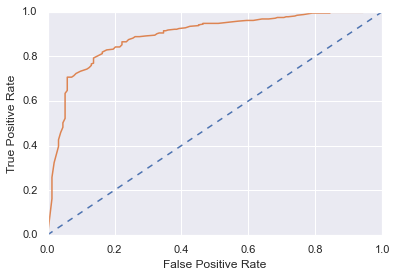

In [192]:
# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
rf_train_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for Test Data**

In [193]:
rf_confusion_matrix_test=confusion_matrix(test_labels, rf_ytest_predict)
rf_confusion_matrix_test

array([[100,  53],
       [ 29, 274]])

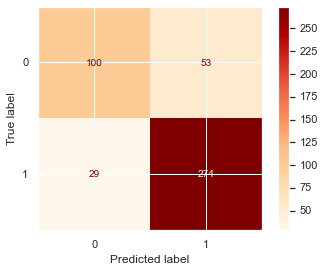

In [195]:
plot_confusion_matrix(rfcl,X_test,test_labels,colorbar=True,cmap='OrRd')

**Test Data Accuracy**

In [196]:
rf_test_acc=rfcl.score(X_test,test_labels)
rf_test_acc

0.8201754385964912

**Classifiaction Report of Test Data**

In [197]:
print(classification_report(test_labels, rf_ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



**Test Data - Precision,Recall & f1 score of class 0**

In [198]:
rf_metrics=classification_report(test_labels, rf_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_f1=round(df.loc["0"][2],2)
rf_test_recall=round(df.loc["0"][1],2)
rf_test_precision=round(df.loc["0"][0],2)
print ('rf_test_precision',rf_test_precision)
print ('rf_test_recall',rf_test_recall)
print ('rf_test_f1',rf_test_f1)

rf_test_precision 0.78
rf_test_recall 0.65
rf_test_f1 0.71


**Test Data - Precision,Recall & f1 score of class 1**

In [199]:
rf_metrics=classification_report(test_labels, rf_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_f1=round(df.loc["1"][2],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_precision=round(df.loc["1"][0],2)
print ('rf_test_precision',rf_test_precision)
print ('rf_test_recall',rf_test_recall)
print ('rf_test_f1',rf_test_f1)

rf_test_precision 0.84
rf_test_recall 0.9
rf_test_f1 0.87


##### Conclusion Random Forest Base Model :

**Train Data Class 0:**

* AUC: 100%
* Accuracy: 100%
* Precision: 100%
* Recall: 100%
* f1-Score: 100%

**Train Data Class 1:**

* AUC: 100%
* Accuracy: 100%
* Precision: 100%
* Recall: 100%
* f1-Score: 100%

**Test Data Class 0:**

* AUC: 89.2%
* Accuracy: 82%
* Precision: 78%
* Recall: 65%
* f1-Score: 71%

**Test Data Class 0:**

* AUC: 89.2%
* Accuracy: 82%
* Precision: 84%
* Recall: 90%
* f1-Score: 87%

##### Bagging of Random Forest

In [200]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf_bag = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf_bag,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,train_labels)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

**Predicting the Training and Testing data**

In [201]:
rf_bag_ytrain_predict = Bagging_model.predict(X_train)
rf_bag_ytest_predict = Bagging_model.predict(X_test)

In [202]:
rf_bag_ytrain_predict

array([0, 1, 0, ..., 1, 1, 1], dtype=int8)

In [203]:
rf_bag_ytest_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

**Getting the Predicted Probability**

In [204]:
rf_bag_ytrain_predict
rf_bag_ytrain_predict_prob=Bagging_model.predict_proba(X_train)
rf_bag_ytrain_predict_prob
pd.DataFrame(rf_bag_ytrain_predict_prob).head()

0       1
0  0.9047  0.0953
1  0.1279  0.8721
2  0.5896  0.4104
3  0.0425  0.9575
4  0.0338  0.9662

In [205]:
rf_bag_ytest_predict
rf_bag_ytest_predict_prob=Bagging_model.predict_proba(X_test)
rf_bag_ytest_predict_prob
pd.DataFrame(rf_bag_ytest_predict_prob).head()

0       1
0  0.6813  0.3187
1  0.2965  0.7035
2  0.0410  0.9590
3  0.7510  0.2490
4  0.1168  0.8832

##### Model Evaluation - Bagging of Random Forest

**AUC and ROC for the Training Data**

AUC: 0.997


Text(0, 0.5, 'True Positive Rate')

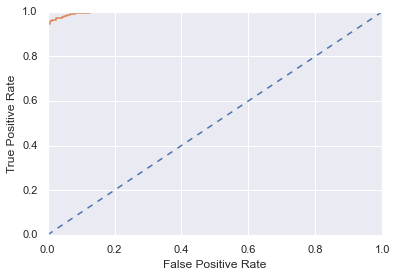

In [207]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_bag_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_bag_train_auc)
# calculate roc curve
rf_bag_train_fpr, rf_bag_train_tpr, rf_bag_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_bag_train_fpr, rf_bag_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [209]:
rf_bag_confusion_matrix_train=confusion_matrix(train_labels, rf_bag_ytrain_predict)
rf_bag_confusion_matrix_train

array([[277,  30],
       [  4, 750]])

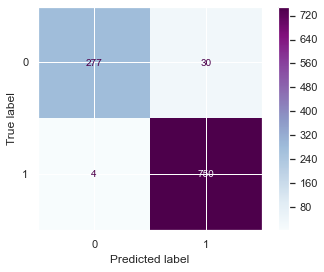

In [211]:
plot_confusion_matrix(Bagging_model,X_train,train_labels,colorbar=True,cmap='BuPu')

**Train Data Accuracy**

In [212]:
rf_bag_train_acc=Bagging_model.score(X_train,train_labels)
rf_bag_train_acc

0.9679547596606974

**Classification Report of Train Data**

In [213]:
print(classification_report(train_labels, rf_bag_ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [214]:
rf_bag_metrics=classification_report(train_labels, rf_bag_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_bag_metrics).transpose()
rf_bag_train_f1=round(df.loc["0"][2],2)
rf_bag_train_recall=round(df.loc["0"][1],2)
rf_bag_train_precision=round(df.loc["0"][0],2)
print ('rf_bag_train_precision',rf_bag_train_precision)
print ('rf_bag_train_recall',rf_bag_train_recall)
print ('rf_bag_train_f1',rf_bag_train_f1)

rf_bag_train_precision 0.99
rf_bag_train_recall 0.9
rf_bag_train_f1 0.94


**Train Data - Precision,Recall & f1 score of class 1**

In [215]:
rf_bag_metrics=classification_report(train_labels, rf_bag_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_bag_metrics).transpose()
rf_bag_train_f1=round(df.loc["1"][2],2)
rf_bag_train_recall=round(df.loc["1"][1],2)
rf_bag_train_precision=round(df.loc["1"][0],2)
print ('rf_bag_train_precision',rf_bag_train_precision)
print ('rf_bag_train_recall',rf_bag_train_recall)
print ('rf_bag_train_f1',rf_bag_train_f1)

rf_bag_train_precision 0.96
rf_bag_train_recall 0.99
rf_bag_train_f1 0.98


**AUC and ROC for the Test Data**

AUC: 0.897


Text(0, 0.5, 'True Positive Rate')

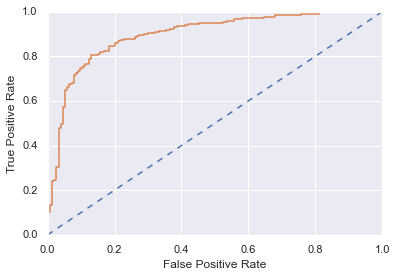

In [216]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
rf_bag_train_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_bag_train_auc)
# calculate roc curve
rf_bag_train_fpr, rf_bag_train_tpr, rf_bag_train_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_bag_train_fpr, rf_bag_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for Test Data**

In [217]:
rf_bag_confusion_matrix_test=confusion_matrix(test_labels, rf_bag_ytest_predict)
rf_bag_confusion_matrix_test

array([[104,  49],
       [ 29, 274]])

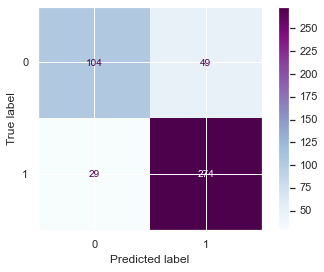

In [218]:
plot_confusion_matrix(Bagging_model,X_test,test_labels,colorbar=True,cmap='BuPu')

**Test Data Accuracy**

In [219]:
rf_bag_test_acc=Bagging_model.score(X_test,test_labels)
rf_bag_test_acc

0.8289473684210527

**Classifiaction Report of Test Data**

In [220]:
print(classification_report(test_labels, rf_bag_ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



**Test Data - Precision,Recall & f1 score of class 0**

In [224]:
rf_bag_metrics=classification_report(test_labels, rf_bag_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_bag_metrics).transpose()
rf_bag_test_f1=round(df.loc["0"][2],2)
rf_bag_test_recall=round(df.loc["0"][1],2)
rf_bag_test_precision=round(df.loc["0"][0],2)
print ('rf_bag_test_precision',rf_bag_test_precision)
print ('rf_bag_test_recall',rf_bag_test_recall)
print ('rf_bag_test_f1',rf_bag_test_f1)

rf_bag_test_precision 0.78
rf_bag_test_recall 0.68
rf_bag_test_f1 0.73


**Test Data - Precision,Recall & f1 score of class 1**

In [226]:
rf_bag_metrics=classification_report(test_labels, rf_bag_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_bag_metrics).transpose()
rf_bag_test_f1=round(df.loc["1"][2],2)
rf_bag_test_recall=round(df.loc["1"][1],2)
rf_bag_test_precision=round(df.loc["1"][0],2)
print ('rf_bag_test_precision',rf_bag_test_precision)
print ('rf_bag_test_recall',rf_bag_test_recall)
print ('rf_bag_test_f1',rf_bag_test_f1)

rf_bag_test_precision 0.85
rf_bag_test_recall 0.9
rf_bag_test_f1 0.88


##### Conclusion Bagging of Random Forest

**Train Data Class 0:**

* AUC: 99.7%
* Accuracy: 97%
* Precision: 99%
* Recall: 90%
* f1-Score: 94%

**Train Data Class 1:**

* AUC: 99.7%
* Accuracy: 97%
* Precision: 96%
* Recall: 99%
* f1-Score: 98%

**Test Data Class 0:**

* AUC: 89.7%
* Accuracy: 83%
* Precision: 78%
* Recall: 68%
* f1-Score: 73%

**Test Data Class 1:**

* AUC: 89.7%
* Accuracy: 83%
* Precision: 85%
* Recall: 90%
* f1-Score: 88%

##### Ada Boost Model

In [229]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,train_labels)

AdaBoostClassifier(n_estimators=100, random_state=1)

**Predicting the Training and Testing data**

In [230]:
ADB_ytrain_predict = ADB_model.predict(X_train)
ADB_ytest_predict = ADB_model.predict(X_test)

In [231]:
ADB_ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [232]:
ADB_ytest_predict

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

**Getting the Predicted Probability**

In [233]:
ADB_ytrain_predict
ADB_ytrain_predict_prob=ADB_model.predict_proba(X_train)
ADB_ytrain_predict_prob
pd.DataFrame(ADB_ytrain_predict_prob).head()

0         1
0  0.501152  0.498848
1  0.493238  0.506762
2  0.497106  0.502894
3  0.492405  0.507595
4  0.491090  0.508910

In [234]:
ADB_ytest_predict
ADB_ytest_predict_prob=ADB_model.predict_proba(X_test)
ADB_ytest_predict_prob
pd.DataFrame(ADB_ytest_predict_prob).head()

0         1
0  0.502173  0.497827
1  0.496755  0.503245
2  0.480057  0.519943
3  0.505525  0.494475
4  0.493868  0.506132

##### Model Evaluation - ADA Boosting Model

**AUC and ROC for the Training Data**

AUC: 0.915


Text(0, 0.5, 'True Positive Rate')

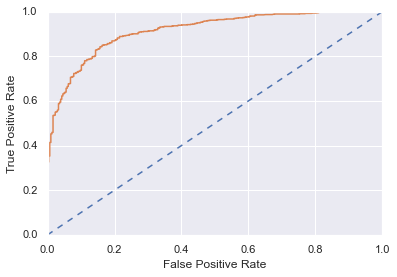

In [236]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % ADB_train_auc)
# calculate roc curve
ADB_train_fpr, ADB_train_tpr, ADB_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [237]:
ADB_confusion_matrix_train=confusion_matrix(train_labels, ADB_ytrain_predict)
ADB_confusion_matrix_train

array([[214,  93],
       [ 66, 688]])

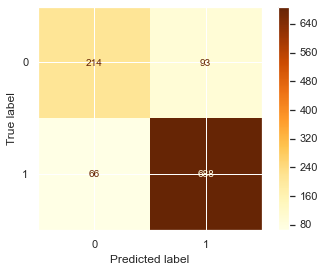

In [239]:
plot_confusion_matrix(ADB_model,X_train,train_labels,colorbar=True,cmap='YlOrBr')

**Train Data Accuracy**

In [243]:
ADB_train_acc=ADB_model.score(X_train,train_labels)
ADB_train_acc

0.8501413760603205

**Classification Report of Train Data**

In [244]:
print(classification_report(train_labels, ADB_ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [255]:
ADB_metrics=classification_report(train_labels, ADB_ytrain_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_train_f1=round(df.loc["0"][2],2)
ADB_train_recall=round(df.loc["0"][1],2)
ADB_train_precision=round(df.loc["0"][0],2)
print ('ADB_train_precision',ADB_train_precision)
print ('ADB_train_recall',ADB_train_recall)
print ('ADB_train_f1',ADB_train_f1)

ADB_train_precision 0.76
ADB_train_recall 0.7
ADB_train_f1 0.73


**Train Data - Precision,Recall & f1 score of class 1**

In [256]:
ADB_metrics=classification_report(train_labels, ADB_ytrain_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_train_f1=round(df.loc["1"][2],2)
ADB_train_recall=round(df.loc["1"][1],2)
ADB_train_precision=round(df.loc["1"][0],2)
print ('ADB_train_precision',ADB_train_precision)
print ('ADB_train_recall',ADB_train_recall)
print ('ADB_train_f1',ADB_train_f1)

ADB_train_precision 0.88
ADB_train_recall 0.91
ADB_train_f1 0.9


**AUC and ROC for the Test Data**

AUC: 0.877


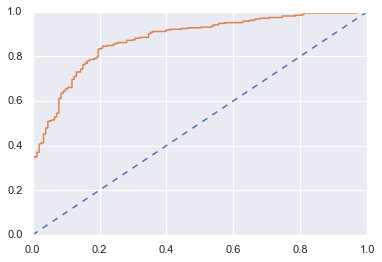

In [250]:
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % ADB_test_auc)
# calculate roc curve
ADB_test_fpr, ADB_test_tpr, ADB_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr)

**Confusion Matrix for Test Data**

In [251]:
ADB_confusion_matrix_test=confusion_matrix(test_labels, ADB_ytest_predict)
ADB_confusion_matrix_test

array([[103,  50],
       [ 35, 268]])

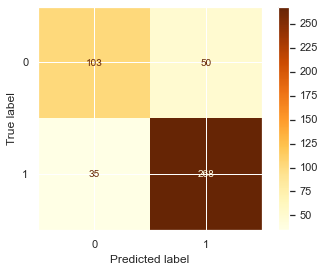

In [252]:
plot_confusion_matrix(ADB_model,X_test,test_labels,colorbar=True,cmap='YlOrBr')

**Test Data Accuracy**

In [253]:
ADB_test_acc=ADB_model.score(X_test,test_labels)
ADB_test_acc

0.8135964912280702

**Classifiaction Report of Test Data**

In [254]:
print(classification_report(test_labels, ADB_ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



**Test Data - Precision,Recall & f1 score of class 0**

In [257]:
ADB_metrics=classification_report(test_labels, ADB_ytest_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_test_f1=round(df.loc["0"][2],2)
ADB_test_recall=round(df.loc["0"][1],2)
ADB_test_precision=round(df.loc["0"][0],2)
print ('ADB_test_precision',ADB_test_precision)
print ('ADB_test_recall',ADB_test_recall)
print ('ADB_test_f1',ADB_test_f1)

ADB_test_precision 0.75
ADB_test_recall 0.67
ADB_test_f1 0.71


**Test Data - Precision,Recall & f1 score of class 1**

In [258]:
ADB_metrics=classification_report(test_labels, ADB_ytest_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_test_f1=round(df.loc["1"][2],2)
ADB_test_recall=round(df.loc["1"][1],2)
ADB_test_precision=round(df.loc["1"][0],2)
print ('ADB_test_precision',ADB_test_precision)
print ('ADB_test_recall',ADB_test_recall)
print ('ADB_test_f1',ADB_test_f1)

ADB_test_precision 0.84
ADB_test_recall 0.88
ADB_test_f1 0.86


##### Conclusion Ada Boost Model

**Train Data Class 0:**

* AUC: 91.5%
* Accuracy: 85%
* Precision: 76%
* Recall: 70%
* f1-Score: 73%

**Train Data Class 1:**

* AUC: 91.5%
* Accuracy: 85%
* Precision: 88%
* Recall: 91%
* f1-Score: 90%

**Test Data Class 0:**

* AUC: 87.7%
* Accuracy: 81%
* Precision: 75%
* Recall: 67%
* f1-Score: 71%

**Test Data Class 1:**

* AUC: 87.7%
* Accuracy: 81%
* Precision: 84%
* Recall: 88%
* f1-Score: 86%

##### Gradient Boosting Model

In [261]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train,train_labels)

**Predicting the Training and Testing data**

In [262]:
gbcl_ytrain_predict = gbcl.predict(X_train)
gbcl_ytest_predict = gbcl.predict(X_test)

In [263]:
gbcl_ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [264]:
gbcl_ytest_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

**Getting the Predicted Probability**

In [265]:
gbcl_ytrain_predict
gbcl_ytrain_predict_prob=gbcl.predict_proba(X_train)
gbcl_ytrain_predict_prob
pd.DataFrame(gbcl_ytrain_predict_prob).head()

0         1
0  0.833670  0.166330
1  0.071905  0.928095
2  0.335574  0.664426
3  0.049894  0.950106
4  0.031041  0.968959

In [266]:
gbcl_ytest_predict
gbcl_ytest_predict_prob=gbcl.predict_proba(X_test)
gbcl_ytest_predict_prob
pd.DataFrame(gbcl_ytest_predict_prob).head()

0         1
0  0.690657  0.309343
1  0.236942  0.763058
2  0.001102  0.998898
3  0.840247  0.159753
4  0.111644  0.888356

##### Model Evaluation - Gradient Boosting Model

**AUC and ROC for the Training Data**

AUC: 0.951


Text(0, 0.5, 'True Positive Rate')

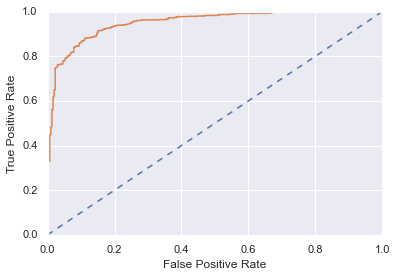

In [268]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [269]:
gbcl_confusion_matrix_train=confusion_matrix(train_labels, gbcl_ytrain_predict)
gbcl_confusion_matrix_train

array([[239,  68],
       [ 46, 708]])

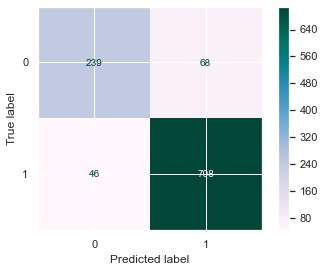

In [270]:
plot_confusion_matrix(gbcl,X_train,train_labels,colorbar=True,cmap='PuBuGn')

**Train Data Accuracy**

In [271]:
gbcl_train_acc=gbcl.score(X_train,train_labels)
gbcl_train_acc

0.8925541941564562

**Classification Report of Train Data**

In [272]:
print(classification_report(train_labels, gbcl_ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [273]:
gbcl_metrics=classification_report(train_labels, gbcl_ytrain_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["0"][2],2)
gbcl_train_recall=round(df.loc["0"][1],2)
gbcl_train_precision=round(df.loc["0"][0],2)
print ('gbcl_train_precision',gbcl_train_precision)
print ('gbcl_train_recall',gbcl_train_recall)
print ('gbcl_train_f1',gbcl_train_f1)

gbcl_train_precision 0.84
gbcl_train_recall 0.78
gbcl_train_f1 0.81


**Train Data - Precision,Recall & f1 score of class 1**

In [274]:
gbcl_metrics=classification_report(train_labels, gbcl_ytrain_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["1"][2],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision',gbcl_train_precision)
print ('gbcl_train_recall',gbcl_train_recall)
print ('gbcl_train_f1',gbcl_train_f1)

gbcl_train_precision 0.91
gbcl_train_recall 0.94
gbcl_train_f1 0.93


**AUC and ROC for the Test Data**

AUC: 0.899


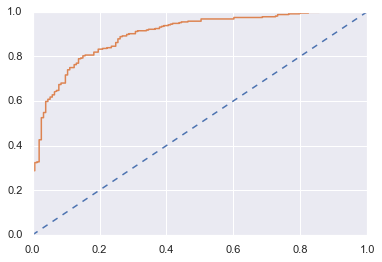

In [275]:
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr)

**Confusion Matrix for Test Data**

In [276]:
gbcl_confusion_matrix_test=confusion_matrix(test_labels, gbcl_ytest_predict)
gbcl_confusion_matrix_test

array([[105,  48],
       [ 27, 276]])

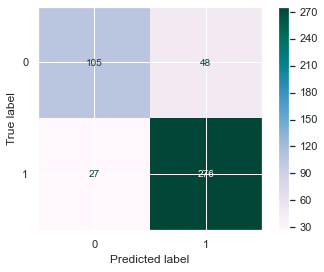

In [278]:
plot_confusion_matrix(gbcl,X_test,test_labels,colorbar=True,cmap='PuBuGn')

**Test Data Accuracy**

In [279]:
gbcl_test_acc=gbcl.score(X_test,test_labels)
gbcl_test_acc

0.8355263157894737

**Classifiaction Report of Test Data**

In [280]:
print(classification_report(test_labels, gbcl_ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



**Test Data - Precision,Recall & f1 score of class 0**

In [281]:
gbcl_metrics=classification_report(test_labels, gbcl_ytest_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_f1=round(df.loc["0"][2],2)
gbcl_test_recall=round(df.loc["0"][1],2)
gbcl_test_precision=round(df.loc["0"][0],2)
print ('gbcl_test_precision',gbcl_test_precision)
print ('gbcl_test_recall',gbcl_test_recall)
print ('gbcl_test_f1',gbcl_test_f1)

gbcl_test_precision 0.8
gbcl_test_recall 0.69
gbcl_test_f1 0.74


**Test Data - Precision,Recall & f1 score of class 1**

In [283]:
gbcl_metrics=classification_report(test_labels, gbcl_ytest_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_f1=round(df.loc["1"][2],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision',gbcl_test_precision)
print ('gbcl_test_recall',gbcl_test_recall)
print ('gbcl_test_f1',gbcl_test_f1)

gbcl_test_precision 0.85
gbcl_test_recall 0.91
gbcl_test_f1 0.88


##### Conclusion Gradient Boost Model

**Train Data Class 0:**

* AUC: 95.1%
* Accuracy: 89%
* Precision: 84%
* Recall: 78%
* f1-Score: 81%

**Train Data Class 1:**

* AUC: 95.1%
* Accuracy: 89%
* Precision: 91%
* Recall: 94%
* f1-Score: 93%

**Test Data Class 0:**

* AUC: 89.9%
* Accuracy: 84%
* Precision: 80%
* Recall: 69%
* f1-Score: 74%

**Test Data Class 1:**

* AUC: 89.9%
* Accuracy: 84%
* Precision: 85%
* Recall: 91%
* f1-Score: 88%

##### Tunned Logistic Regression Model

In [286]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

**Grid Search for finding out the optimal values for the hyper parameters**

In [289]:
param_grid ={'penalty':['l2','l1','none'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.0001,0.00001]}

model = LogisticRegression(max_iter=10000,n_jobs=-1)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5,n_jobs=-1,scoring='f1')

In [290]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001}


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none', solver='sag')

**Predicting on Training and Test dataset**

In [291]:
lr_tunned_ytrain_predict = best_grid.predict(X_train)
lr_tunned_ytest_predict = best_grid.predict(X_test)

In [292]:
lr_tunned_ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [293]:
lr_tunned_ytest_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

**Getting the Predicted Probability**

In [294]:
lr_tunned_ytrain_predict_prob=best_grid.predict_proba(X_train)
lr_tunned_ytrain_predict_prob
pd.DataFrame(lr_tunned_ytrain_predict_prob).head()

0         1
0  0.938636  0.061364
1  0.098090  0.901910
2  0.272524  0.727476
3  0.115593  0.884407
4  0.016852  0.983148

In [295]:
lr_tunned_ytest_predict_prob=best_grid.predict_proba(X_test)
lr_tunned_ytest_predict_prob
pd.DataFrame(lr_tunned_ytest_predict_prob).head()

0         1
0  0.431510  0.568490
1  0.158065  0.841935
2  0.005284  0.994716
3  0.852118  0.147882
4  0.061924  0.938076

##### Model Evaluation - Tunned Logistic Regression Model

**AUC and ROC for the Training Data**

AUC: 0.890


Text(0, 0.5, 'True Positive Rate')

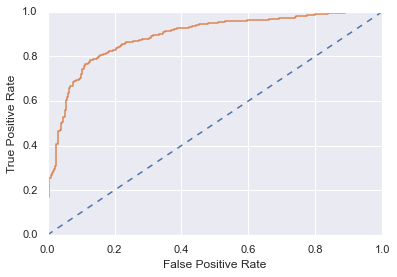

In [296]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
lr_tunned_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % lr_tunned_train_auc)
# calculate roc curve
lr_tunned_train_fpr, lr_tunned_train_tpr, lr_tunned_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tunned_train_fpr, lr_tunned_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [297]:
lr_tunned_confusion_matrix_train=confusion_matrix(train_labels, lr_tunned_ytrain_predict)
lr_tunned_confusion_matrix_train

array([[197, 110],
       [ 66, 688]])

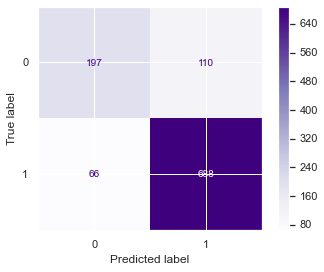

In [298]:
plot_confusion_matrix(best_grid,X_train,train_labels,colorbar=True,cmap='Purples')

**Train Data Accuracy**

In [299]:
lr_tunned_train_acc=best_grid.score(X_train,train_labels)
lr_tunned_train_acc

0.8341187558906692

**Classification Report of Training Data**

In [300]:
print(classification_report(train_labels, lr_tunned_ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [301]:
lr_tunned_metrics=classification_report(train_labels, lr_tunned_ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_tunned_metrics).transpose()
lr_tunned_train_f1=round(df.loc["0"][2],2)
lr_tunned_train_recall=round(df.loc["0"][1],2)
lr_tunned_train_precision=round(df.loc["0"][0],2)
print ('lr_tunned_train_precision',lr_tunned_train_precision)
print ('lr_tunned_train_recall',lr_tunned_train_recall)
print ('lr_tunned_train_f1',lr_tunned_train_f1)

lr_tunned_train_precision 0.75
lr_tunned_train_recall 0.64
lr_tunned_train_f1 0.69


**Train Data - Precision,Recall & f1 score of class 1**

In [302]:
lr_tunned_metrics=classification_report(train_labels, lr_tunned_ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_tunned_metrics).transpose()
lr_tunned_train_f1=round(df.loc["1"][2],2)
lr_tunned_train_recall=round(df.loc["1"][1],2)
lr_tunned_train_precision=round(df.loc["1"][0],2)
print ('lr_tunned_train_precision',lr_tunned_train_precision)
print ('lr_tunned_train_recall',lr_tunned_train_recall)
print ('lr_tunned_train_f1',lr_tunned_train_f1)

lr_tunned_train_precision 0.86
lr_tunned_train_recall 0.91
lr_tunned_train_f1 0.89


**AUC and ROC for the Test Data**

AUC: 0.877


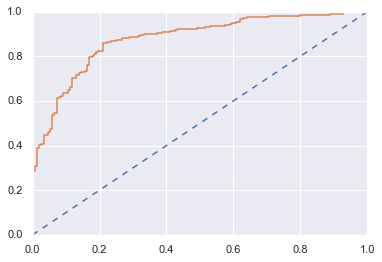

In [303]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tunned_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_tunned_test_fpr, lr_tunned_test_tpr, lr_tunned_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tunned_test_fpr, lr_tunned_test_tpr)

**Confusion Matrix for Test Data**

In [304]:
lr_tunned_confusion_matrix_test=confusion_matrix(test_labels, lr_tunned_ytest_predict)
lr_tunned_confusion_matrix_test

array([[110,  43],
       [ 36, 267]])

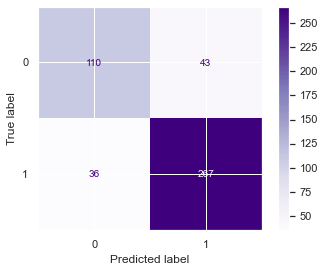

In [305]:
plot_confusion_matrix(best_grid,X_test,test_labels,colorbar=True,cmap='Purples')

**Test Data Accuracy**

In [306]:
lr_tunned_test_acc=best_grid.score(X_test,test_labels)
lr_tunned_test_acc

0.8267543859649122

**Classifiaction Report of Test Data**

In [308]:
print(classification_report(test_labels, lr_tunned_ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



**Test Data - Precision,Recall & f1 score of class 0**

In [309]:
lr_tunned_metrics=classification_report(test_labels, lr_tunned_ytest_predict,output_dict=True)
df=pd.DataFrame(lr_tunned_metrics).transpose()
lr_tunned_test_precision=round(df.loc["0"][0],2)
lr_tunned_test_recall=round(df.loc["0"][1],2)
lr_tunned_test_f1=round(df.loc["0"][2],2)
print ('lr_tunned_test_precision',lr_tunned_test_precision)
print ('lr_tunned_test_recall',lr_tunned_test_recall)
print ('lr_tunned_test_f1',lr_tunned_test_f1)

lr_tunned_test_precision 0.75
lr_tunned_test_recall 0.72
lr_tunned_test_f1 0.74


**Test Data - Precision,Recall & f1 score of class 1**

In [310]:
lr_tunned_metrics=classification_report(test_labels, lr_tunned_ytest_predict,output_dict=True)
df=pd.DataFrame(lr_tunned_metrics).transpose()
lr_tunned_test_precision=round(df.loc["1"][0],2)
lr_tunned_test_recall=round(df.loc["1"][1],2)
lr_tunned_test_f1=round(df.loc["1"][2],2)
print ('lr_tunned_test_precision',lr_tunned_test_precision)
print ('lr_tunned_test_recall',lr_tunned_test_recall)
print ('lr_tunned_test_f1',lr_tunned_test_f1)

lr_tunned_test_precision 0.86
lr_tunned_test_recall 0.88
lr_tunned_test_f1 0.87


##### Conclusion Tunned Logistic Regression Model

**Train Data Class 0:**

* AUC: 89%
* Accuracy: 83%
* Precision: 75%
* Recall: 64%
* f1-Score: 69%

**Train Data Class 1:**

* AUC: 89%
* Accuracy: 83%
* Precision: 86%
* Recall: 91%
* f1-Score: 89%

**Test Data Class 0:**

* AUC: 87.7%
* Accuracy: 83%
* Precision: 75%
* Recall: 72%
* f1-Score: 74%

**Test Data Class 1:**

* AUC: 87.7%
* Accuracy: 83%
* Precision: 86%
* Recall: 88%
* f1-Score: 87%

##### LDA Model with Custom Cutoff Tunning

**We will do this exercise only on the training data.**

0.1 

Accuracy Score 0.7587 

F1 Score 0.8532 

Recall Score 0.9867 

Precision Score 0.7515 

Confusion Matrix


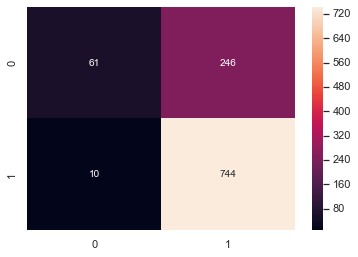

0.2 

Accuracy Score 0.7926 

F1 Score 0.8689 

Recall Score 0.9668 

Precision Score 0.789 

Confusion Matrix


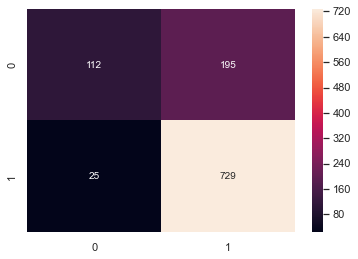

0.3 

Accuracy Score 0.8134 

F1 Score 0.8787 

Recall Score 0.9509 

Precision Score 0.8166 

Confusion Matrix


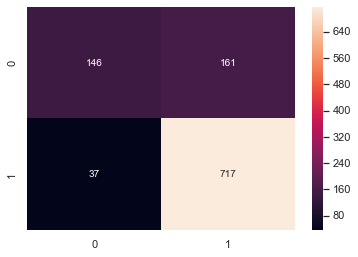

0.4 

Accuracy Score 0.8341 

F1 Score 0.8897 

Recall Score 0.9416 

Precision Score 0.8432 

Confusion Matrix


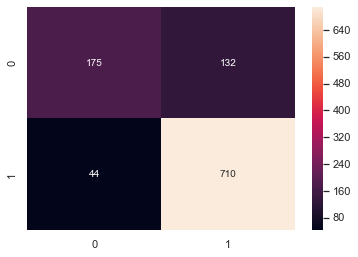

0.5 

Accuracy Score 0.8341 

F1 Score 0.8862 

Recall Score 0.9085 

Precision Score 0.8649 

Confusion Matrix


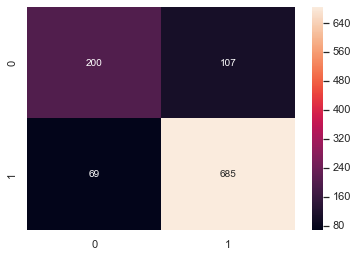

0.6 

Accuracy Score 0.8275 

F1 Score 0.8781 

Recall Score 0.874 

Precision Score 0.8822 

Confusion Matrix


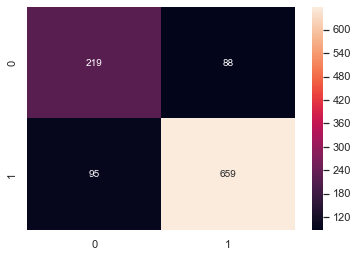

0.7 

Accuracy Score 0.8303 

F1 Score 0.875 

Recall Score 0.8355 

Precision Score 0.9184 

Confusion Matrix


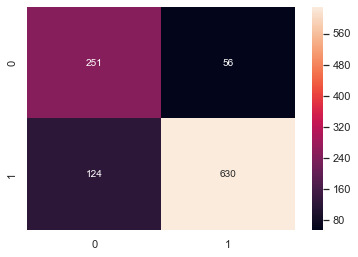

0.8 

Accuracy Score 0.7908 

F1 Score 0.8363 

Recall Score 0.752 

Precision Score 0.9419 

Confusion Matrix


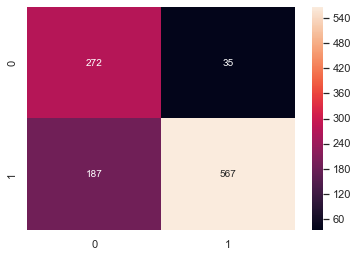

0.9 

Accuracy Score 0.6975 

F1 Score 0.7384 

Recall Score 0.6008 

Precision Score 0.9577 

Confusion Matrix


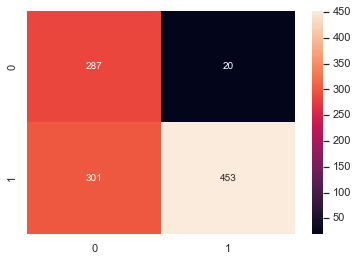

In [314]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j       #defining the cut-off value of our choice
    custom_cutoff_data=[] #defining an empty list
    for i in range(0,len(train_labels)): #defining a loop for the length of the test data
        if np.array(lda_ytrain_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
                                                           #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(train_labels,custom_cutoff_data),4),'\n')
    print('F1 Score',round(metrics.f1_score(train_labels,custom_cutoff_data),4),'\n')
    print('Recall Score',round(metrics.recall_score(train_labels,custom_cutoff_data),4),'\n')
    print('Precision Score',round(metrics.precision_score(train_labels,custom_cutoff_data),4),'\n')    
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(train_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [315]:
#Predicting the classes on the Train data

data_pred_custom_cutoff=[]
for i in range(0,len(lda_ytrain_predict_prob[:,1])):
    if np.array(lda_ytrain_predict_prob[:,1])[i]>0.6:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

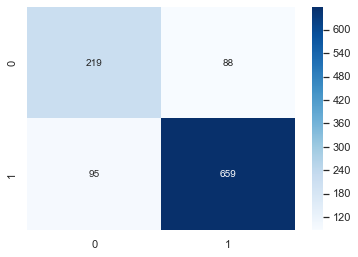

In [316]:
sns.heatmap((metrics.confusion_matrix(train_labels,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Blues');

In [317]:
print('Classification Report of the default cut-off train data:\n\n',metrics.classification_report(train_labels,lda_ytrain_predict),'\n\n\n')
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(train_labels,data_pred_custom_cutoff),'\n')


Classification Report of the default cut-off train data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.70      0.71      0.71       307
           1       0.88      0.87      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [322]:
#Predicting the classes on the test data
data_pred_custom_cutoff=[]
for i in range(0,len(lda_ytest_predict_prob[:,1])):
    if np.array(lda_ytest_predict_prob[:,1])[i]>0.6:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

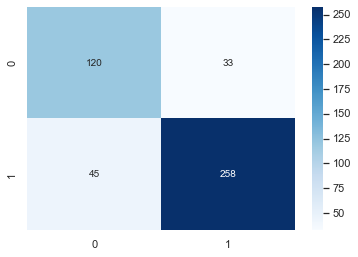

In [323]:
sns.heatmap((metrics.confusion_matrix(test_labels,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Blues');

In [324]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(test_labels,lda_ytest_predict),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(test_labels,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.73      0.78      0.75       153
           1       0.89      0.85      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.82      0.81       456
weighted avg       0.83      0.83      0.83       456
 



##### Conclusion

We can take 0.6 cutoff for slightly better performance of the LDA model.

##### Tunned KNN Model

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error
Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [326]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, train_labels)
    # evaluate test accuracy
    scores = knn.score(X_test, test_labels)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17324561403508776,
 0.19517543859649122,
 0.19956140350877194,
 0.19956140350877194,
 0.1907894736842105,
 0.20394736842105265,
 0.19736842105263153]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

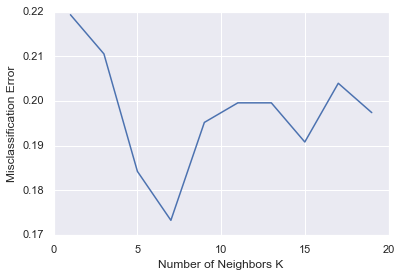

In [327]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 7 it is giving the least misclassification error lets build the model for k=7 & check the evaluation metrics.As per industry standard we always take value in odd number because each instance in essence votes for their class and the class with the most votes is taken as the prediction. If you are using K and you have an even number of classes (e.g. 2) it is a good idea to choose a K value with an odd number to avoid a tie.

In [91]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_tunned=KNeighborsClassifier(n_neighbors=7)
KNN_model_tunned.fit(X_train,train_labels)

KNeighborsClassifier(n_neighbors=7)

**Predicting the Training and Testing data**

In [92]:
KNN_model_tunned_ytrain_predict = KNN_model_tunned.predict(X_train)
KNN_model_tunned_ytest_predict = KNN_model_tunned.predict(X_test)

In [93]:
KNN_model_tunned_ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [94]:
KNN_model_tunned_ytest_predict

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

**Getting the Predicted Probability**

In [95]:
KNN_model_tunned_ytrain_predict
KNN_model_tunned_ytrain_predict_prob=KNN_model_tunned.predict_proba(X_train)
KNN_model_tunned_ytrain_predict_prob
pd.DataFrame(KNN_model_tunned_ytrain_predict_prob).head()

0         1
0  0.714286  0.285714
1  0.142857  0.857143
2  0.285714  0.714286
3  0.285714  0.714286
4  0.000000  1.000000

In [96]:
KNN_model_tunned_ytest_predict
KNN_model_tunned_ytest_predict_prob=KNN_model_tunned.predict_proba(X_test)
KNN_model_tunned_ytest_predict_prob
pd.DataFrame(KNN_model_tunned_ytest_predict_prob).head()

0         1
0  0.571429  0.428571
1  0.285714  0.714286
2  0.142857  0.857143
3  0.285714  0.714286
4  0.142857  0.857143

##### Model Evaluation - Tunned KNN Model

**AUC and ROC for the Training Data**

In [98]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

AUC: 0.917


Text(0, 0.5, 'True Positive Rate')

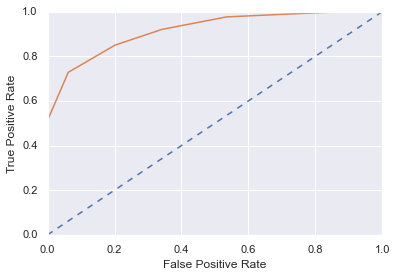

In [99]:
# predict probabilities
probs = KNN_model_tunned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
knn_tunned_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % knn_tunned_train_auc)
# calculate roc curve
knn_tunned_train_fpr, knn_tunned_train_tpr, knn_tunned_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tunned_train_fpr, knn_tunned_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [100]:
knn_tunned_confusion_matrix_train=confusion_matrix(train_labels, KNN_model_tunned_ytrain_predict)
knn_tunned_confusion_matrix_train

array([[202, 105],
       [ 60, 694]])

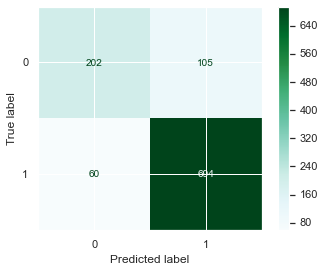

In [101]:
plot_confusion_matrix(KNN_model_tunned,X_train,train_labels,colorbar=True,cmap='BuGn')

**Train Data Accuracy**

In [102]:
knn_tunned_train_acc=KNN_model_tunned.score(X_train,train_labels)
knn_tunned_train_acc

0.8444863336475024

**Classification Report of Train Data**

In [103]:
print(classification_report(train_labels, KNN_model_tunned_ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       307
           1       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



**Train Data - Precision,Recall & f1 score of class 0**

In [104]:
knn_tunned_metrics=classification_report(train_labels, KNN_model_tunned_ytrain_predict,output_dict=True)
df=pd.DataFrame(knn_tunned_metrics).transpose()
knn_tunned_train_f1=round(df.loc["0"][2],2)
knn_tunned_train_recall=round(df.loc["0"][1],2)
knn_tunned_train_precision=round(df.loc["0"][0],2)
print ('knn_tunned_train_precision',knn_tunned_train_precision)
print ('knn_tunned_train_recall',knn_tunned_train_recall)
print ('knn_tunned_train_f1',knn_tunned_train_f1)

knn_tunned_train_precision 0.77
knn_tunned_train_recall 0.66
knn_tunned_train_f1 0.71


**Train Data - Precision,Recall & f1 score of class 1**

In [105]:
knn_tunned_metrics=classification_report(train_labels, KNN_model_tunned_ytrain_predict,output_dict=True)
df=pd.DataFrame(knn_tunned_metrics).transpose()
knn_tunned_train_f1=round(df.loc["1"][2],2)
knn_tunned_train_recall=round(df.loc["1"][1],2)
knn_tunned_train_precision=round(df.loc["1"][0],2)
print ('knn_tunned_train_precision',knn_tunned_train_precision)
print ('knn_tunned_train_recall',knn_tunned_train_recall)
print ('knn_tunned_train_f1',knn_tunned_train_f1)

knn_tunned_train_precision 0.87
knn_tunned_train_recall 0.92
knn_tunned_train_f1 0.89


**AUC and ROC for the Test Data**

AUC: 0.863


Text(0, 0.5, 'True Positive Rate')

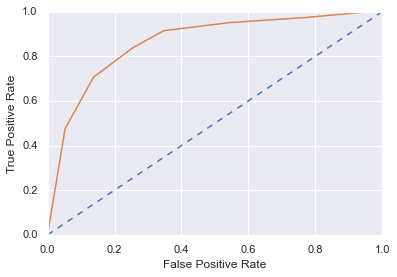

In [106]:
# predict probabilities
probs = KNN_model_tunned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
knn_tunned_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % knn_tunned_test_auc)
# calculate roc curve
knn_tunned_test_fpr, knn_tunned_test_tpr, knn_tunned_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tunned_test_fpr, knn_tunned_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Test Data**

In [107]:
knn_tunned_confusion_matrix_test=confusion_matrix(test_labels, KNN_model_tunned_ytest_predict)
knn_tunned_confusion_matrix_test

array([[100,  53],
       [ 26, 277]])

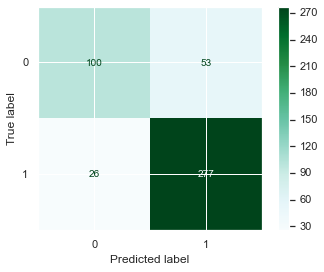

In [108]:
plot_confusion_matrix(KNN_model_tunned,X_test,test_labels,colorbar=True,cmap='BuGn')

**Test Data Accuracy**

In [109]:
knn_tunned_test_acc=KNN_model_tunned.score(X_test,test_labels)
knn_tunned_test_acc

0.8267543859649122

**Classification Report of Test Data**

In [110]:
print(classification_report(test_labels, KNN_model_tunned_ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



**Test Data - Precision,Recall & f1 score of class 0**

In [111]:
knn_tunned_metrics=classification_report(test_labels, KNN_model_tunned_ytest_predict,output_dict=True)
df=pd.DataFrame(knn_tunned_metrics).transpose()
knn_tunned_test_f1=round(df.loc["0"][2],2)
knn_tunned_test_recall=round(df.loc["0"][1],2)
knn_tunned_test_precision=round(df.loc["0"][0],2)
print ('knn_tunned_test_precision',knn_tunned_test_precision)
print ('knn_tunned_test_recall',knn_tunned_test_recall)
print ('knn_tunned_test_f1',knn_tunned_test_f1)

knn_tunned_test_precision 0.79
knn_tunned_test_recall 0.65
knn_tunned_test_f1 0.72


**Test Data - Precision,Recall & f1 score of class 1**

In [112]:
knn_tunned_metrics=classification_report(test_labels, KNN_model_tunned_ytest_predict,output_dict=True)
df=pd.DataFrame(knn_tunned_metrics).transpose()
knn_tunned_test_f1=round(df.loc["1"][2],2)
knn_tunned_test_recall=round(df.loc["1"][1],2)
knn_tunned_test_precision=round(df.loc["1"][0],2)
print ('knn_tunned_test_precision',knn_tunned_test_precision)
print ('knn_tunned_test_recall',knn_tunned_test_recall)
print ('knn_tunned_test_f1',knn_tunned_test_f1)

knn_tunned_test_precision 0.84
knn_tunned_test_recall 0.91
knn_tunned_test_f1 0.88


##### Conclusion Tunned KNN Model

**Train Data Class 0:**

* AUC: 91.7%
* Accuracy: 84%
* Precision: 77%
* Recall: 66%
* f1-Score: 71%

**Train Data Class 1:**

* AUC: 91.7%
* Accuracy: 84%
* Precision: 87%
* Recall: 92%
* f1-Score: 89%

**Test Data Class 0:**

* AUC: 86.3%
* Accuracy: 83%
* Precision: 79%
* Recall: 65%
* f1-Score: 72%

**Test Data Class 1:**

* AUC: 86.3%
* Accuracy: 83%
* Precision: 84%
* Recall: 91%
* f1-Score: 88%

##### Cross Validation on Naive Bayes Model

**Cross Validation on Train Data**

In [358]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_model, X_train, train_labels, cv=10)
scores

array([0.80373832, 0.78301887, 0.8490566 , 0.83962264, 0.90566038,
       0.8490566 , 0.78301887, 0.83962264, 0.81132075, 0.82075472])

**Cross Validation on Test Data**

In [359]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_model, X_test, test_labels, cv=10)
scores

array([0.7826087 , 0.80434783, 0.86956522, 0.80434783, 0.86956522,
       0.86956522, 0.88888889, 0.82222222, 0.75555556, 0.82222222])

##### Conclusion Cross Validation on Naive Bayes Model

After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same.Hence our model is valid.

#### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. 


**Note** 

* All the models are built above with their train & test accuracy , AUC AND  ROC score and Confusion Matrix and classification report results. Please refer the business report for the results and tabular comparison of the all models.**

#### 1.8 Based on these predictions, what are the insights?

**Insights**

* The Election_Data.xlsx data set has 1525 observations (rows) and 9 variables (columns) in the dataset.

* Their are total 1525 rows & 9 columns in this dataset,indexed from 0 to 1524. Out of 9 variables 7 are int64 , 2 variables are object. Memory used by the dataset: 107.4+ KB.

* There are no null values present in the dataset.

* No Anomalies found in the Dataset.

* Out of 1524 voters 1063 people voted for Labour party and 462 people voted for Conservative party.

* Out of 1524 voters 812 female voters present in the dataset and 713 male voters present in the dataset.

* Most of the participants/voters around (39.8%) gives a score of 3 for the current national economic conditions.

* 36.5% participants/voters gives a score of 4 for the current national economic conditions.

* 16.9% participants/voters gives a score of 2 for the current national economic conditions.

* 5.4% participants/voters gives a score of 5 for the current national economic conditions.

* Only 2.4% participants/voters gives a score of 1 for the current national economic conditions.

* Most of the participants/voters around (42.5%) gives a score of 3 for the current household economic conditions.

* 28.7% participants/voters gives a score of 4 for the current household economic conditions.

* 18.5% participants/voters gives a score of 2 for the current household economic conditions.

* 6.1% participants/voters gives a score of 5 for the current household economic conditions.

* Only 4.3% participants/voters gives a score of 1 for the current household economic conditions.

* Most of the participants/voters around (54.9%) gives a score of 4 to Blair.

* 28.6% of the participants/voters gives a score of 2 to Blair.

* 10% of the participants/voters gives a score of 5 to Blair.

* 6.4% of the participants/voters gives a score of 1 to Blair.

* Only 0.1% of the participants/voters gives a score of 3 to Blair.

* Most of the participants/voters around (40.7%) gives a score of 2 to Hague.

* 36.7% of the participants/voters gives a score of 4 to Hague.

* 15.4% of the participants/voters gives a score of 1 to Hague.

* 4.8% of the participants/voters gives a score of 5 to Hague. of the

* Only 2.8% of the participants/voters gives a score of 1 to Hague.


* 29% of the voters have represent European Unionism sentiments.

* Around 21.7% of the voters are considered to be neutral.

* 49.3% of the voters have represent Eurosceptic sentiment.

* 29.9% of the voters have least i.e. (0) political knowledge - (knowledge of the voters regarding the party's position on European integration).

* 16.4% of voters have high i.e(3) political knowledge - (knowledge of the voters regarding the party's position on European integration).

* 51.2% of voters have fair i.e.(2) political knowledge - (knowledge of the voters regarding the party's position on European integration).

* 2.5% of voters have level(1) political knowledge - (knowledge of the voters regarding the party's position on European integration).

* 53.3% of the voters are female.

* 46.7% of the voters are males.

* 69.7% of the participants/voters vote for Labour Party.

* 30.3% of the participants/voters vote for Conservative Party.

* Their is no such relationship between the variables , hence their is no problem of multicollinearity in the dataset.

* Their is no outliers present in the dataset.
 
* age , Europe ,Hague Blair are the important variables for predictions. 
  
* As per the analysis we come to come know that chances of Labour party to win the election is more as compared to the Conservative party.
  
* As per the context of business problem and the given dataset we finalised KNN algorithm as it  is a good choice because we have a small dataset and the data is noise free and labeled plus KNN works well with smaller dataset because it is a lazy learner. It needs to store all the data and then makes decision only at run time.Moreover , KNN model have good  balanced precision , recall and f1 score.KNN model is reliable to predict which party a voter will vote for on the basis of the given information. 
  
  

**Recommendations**

* News Channel can take large sample of the dataset for better predictions as more is the amount of sample data we can do better prediction.So we apply the other machine learning algorithms  like Random Forest , ANN, etc which works far better on the large dataset.

* As Sample size is an important consideration for research. Larger sample sizes provide more accurate mean values, identify outliers that could skew the data in a smaller sample and provide a smaller margin of error that helps news channel in predicting overall win and seats covered by a particular party. 

In [86]:
import numpy as np
import pandas as pd
import nltk
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as ply
import plotly.figure_factory as ff
import plotly.express as px
sns.set(color_codes=True)
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively

### Problem Statement 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

* President Franklin D. Roosevelt in 1941
* President John F. Kennedy in 1961
* President Richard Nixon in 1973


#### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

##### Loading the Speeches of the Presidents of the United States of America.

In [87]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
sp_1=inaugural.raw('1941-Roosevelt.txt')#speech 1
sp_2=inaugural.raw('1961-Kennedy.txt')# Speech 2
sp_3=inaugural.raw('1973-Nixon.txt') #speech 3

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/rupeshgaur/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [88]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rupeshgaur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##### Speech 1

In [89]:
sp_1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

##### Checking the Number of Characters Present in the Speech 1

In [90]:
print("The Number of the Characters Present in the Speech 1(1941-Roosevelt.txt) is",  len(sp_1))

The Number of the Characters Present in the Speech 1(1941-Roosevelt.txt) is 7571


##### Checking the Number of Words Present in the Speech 1

In [91]:
words_1=sp_1.split()
len(words_1)
print("The Number of the Words Present in the Speech 1(1941-Roosevelt.txt) is",  len(words_1))

The Number of the Words Present in the Speech 1(1941-Roosevelt.txt) is 1360


##### Checking the Number of Sentences Present in the Speech 1

In [92]:
from nltk.tokenize import sent_tokenize
tokenized_text_1=sent_tokenize(sp_1)
tokenized_text_1

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.',
 "In Washington's day the task of the people was to create and weld together a nation.",
 "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.",
 'In this day the task of the people is to save that Nation and its institutions from disruption from without.',
 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be.',
 'If we do not, we risk the real peril of inaction.',
 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit.',
 'The life of a man is three-score years and ten: a little more, a little less.',
 'The life of a nation is the fullness of the measure of its will to live.',
 'There are men who doubt this.',
 'There are men wh

In [93]:
print("The Number of Sentences Present in the Speech 1 (1941-Roosevelt.txt) is " ,len(tokenized_text_1))

The Number of Sentences Present in the Speech 1 (1941-Roosevelt.txt) is  68


##### Speech 2

In [94]:
sp_2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

##### Checking the Number of Characters Present in the Speech 2.

In [95]:
print("The number of the characters present in the speech 2 ('1961-Kennedy.txt') is",  len(sp_2))

The number of the characters present in the speech 2 ('1961-Kennedy.txt') is 7618


##### Checking the Number of Words Present in the Speech 2

In [96]:
words_2=sp_2.split()
len(words_2)
print("The Number of the Words Present in the Speech 2 ('1961-Kennedy.txt') is",  len(words_2))

The Number of the Words Present in the Speech 2 ('1961-Kennedy.txt') is 1390


##### Checking the Number of Sentences Present in the Speech 2

In [97]:
tokenized_text_2=sent_tokenize(sp_2)
tokenized_text_2

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.',
 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.',
 'The world is very different now.',
 'For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life.',
 'And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.',
 'We dare not forget today that we are the heirs of that first revolution.',
 'Let the word go forth from this time and place, to friend and foe alike, that the torch has been pa

In [98]:
print("The Number of Sentences Present in the Speech 2 ('1961-Kennedy.txt') is " ,len(tokenized_text_2))

The Number of Sentences Present in the Speech 2 ('1961-Kennedy.txt') is  52


##### Speech 3

In [99]:
sp_3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

##### Checking the Number of Characters Present in the Speech 3.

In [100]:
print("The Number of the Characters Present in the Speech 3 ('1973-Nixon.txt') is",  len(sp_3))

The Number of the Characters Present in the Speech 3 ('1973-Nixon.txt') is 9991


##### Checking the Number of Words Present in the Speech 3.

In [101]:
words_3=sp_3.split()
len(words_3)
print("The Number of the Words Present in the Speech 3 ('1973-Nixon.txt') is",  len(words_3))

The Number of the Words Present in the Speech 3 ('1973-Nixon.txt') is 1819


##### Checking the Number of Sentences Present in the Speech 3

In [102]:
tokenized_text_3=sent_tokenize(sp_3)
tokenized_text_3

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.',
 'As we meet here today, we stand on the threshold of a new era of peace in the world.',
 'The central question before us is: How shall we use that peace?',
 'Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.',
 'Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.',
 'This past year saw far-reaching results from our new policies for peace.',
 'By continuing to revitalize ou

In [103]:
print("The Number of sentences Present in the Speech 3 ('1973-Nixon.txt') is " ,len(tokenized_text_3))


The Number of sentences Present in the Speech 3 ('1973-Nixon.txt') is  68


##### Table of characters,words and sentences of Problem 2.1

In [104]:
text_count_table = [["S.No",'Speech_Name','Characters_count','words_count','sentence_count'],
              [1,'1941-Roosevelt.txt',7571,1360,68],
              [2,'1961-Kennedy.txt' ,7618,1390,52],
              [3,'1973-Nixon.txt',9991,1819,68]]
fig = ff.create_table(text_count_table)
fig.show()

#### 2.2 Remove all the stopwords from all three speeches. 

##### Create DataFrame(df_s1,df_s2,df_s3) respectively for Speech1,Speech2 and Speech3.

In [105]:
df_s1=pd.DataFrame({"speech1":tokenized_text_1})
df_s2=pd.DataFrame({"speech2":tokenized_text_2})
df_s3=pd.DataFrame({"speech3":tokenized_text_3})

##### DataFrame of Speech 1

In [106]:
df_s1

speech1
0   On each national day of inauguration since 178...
1   In Washington's day the task of the people was...
2   In Lincoln's day the task of the people was to...
3   In this day the task of the people is to save ...
4   To us there has come a time, in the midst of s...
..                                                ...
63  In the face of great perils never before encou...
64  For this we muster the spirit of America, and ...
65                                 We do not retreat.
66                 We are not content to stand still.
67  As Americans, we go forward, in the service of...

[68 rows x 1 columns]

##### DataFrame of Speech 2

In [107]:
df_s2

speech2
0   Vice President Johnson, Mr. Speaker, Mr. Chief...
1   For I have sworn I before you and Almighty God...
2                    The world is very different now.
3   For man holds in his mortal hands the power to...
4   And yet the same revolutionary beliefs for whi...
5   We dare not forget today that we are the heirs...
6   Let the word go forth from this time and place...
7   Let every nation know, whether it wishes us we...
8                    This much we pledge -- and more.
9   To those old allies whose cultural and spiritu...
10  United, there is little we cannot do in a host...
11  Divided, there is little we can do -- for we d...
12  To those new States whom we welcome to the ran...
13  We shall not always expect to find them suppor...
14  But we shall always hope to find them strongly...
15  To those peoples in the huts and villages acro...
16  If a free society cannot help the many who are...
17  To our sister republics south of our border, w...
18  But this peaceful revolution of hope cannot be...
19  Let all our neighbors know that we shall join ...
20  And let every other power know that this Hemis...
21  To that world assembly of sovereign states, th...
22  Finally, to those nations who would make thems...
23              We dare not tempt them with weakness.
24  For only when our arms are sufficient beyond d...
25  But neither can two great and powerful groups ...
26  So let us begin anew -- remembering on both si...
27                Let us never negotiate out of fear.
28                But let us never fear to negotiate.
29  Let both sides explore what problems unite us ...
30  Let both sides, for the first time, formulate ...
31  Let both sides seek to invoke the wonders of s...
32  Together let us explore the stars, conquer the...
33  Let both sides unite to heed in all corners of...
34  And if a beachhead of cooperation may push bac...
35  All this will not be finished in the first 100...
36  Nor will it be finished in the first 1,000 day...
37                                  But let us begin.
38  In your hands, my fellow citizens, more than i...
39  Since this country was founded, each generatio...
40  The graves of young Americans who answered the...
41  Now the trumpet summons us again -- not as a c...
42  Can we forge against these enemies a grand and...
43             Will you join in that historic effort?
44  In the long history of the world, only a few g...
45  I do not shrink from this responsibility -- I ...
46  I do not believe that any of us would exchange...
47  The energy, the faith, the devotion which we b...
48  And so, my fellow Americans: ask not what your...
49  My fellow citizens of the world: ask not what ...
50  Finally, whether you are citizens of America o...
51  With a good conscience our only sure reward, w...

##### DataFrame of Speech 3

In [108]:
df_s3

speech3
0   Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
1   As we meet here today, we stand on the thresho...
2   The central question before us is: How shall w...
3   Let us resolve that this era we are about to e...
4   Let us resolve that this will be what it can b...
..                                                ...
63  As I stand in this place, so hallowed by histo...
64  I think of the dreams they had for America, an...
65  Today, I ask your prayers that in the years ah...
66  Let us pledge together to make these next four...
67  Let us go forward from here confident in hope,...

[68 rows x 1 columns]

In [109]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rupeshgaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Stopwords in English

In [110]:
stop=stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##### EDA Steps for Speech 1-('1941-Roosevelt.txt')

**Remove punctuation and special character like(--)**

In [111]:
df_s1['speech1'] = df_s1['speech1'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
df_s1[['speech1']].head()

speech1
0  On each national day of inauguration since 178...
1  In Washingtons day the task of the people was ...
2  In Lincolns day the task of the people was to ...
3  In this day the task of the people is to save ...
4  To us there has come a time in the midst of sw...

**Convert the Speech into Lower Case Conversion**

In [112]:
df_s1['speech1'] = df_s1['speech1'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_s1['speech1'].head()

0    on each national day of inauguration since 178...
1    in washingtons day the task of the people was ...
2    in lincolns day the task of the people was to ...
3    in this day the task of the people is to save ...
4    to us there has come a time in the midst of sw...
Name: speech1, dtype: object

**DataFrame with Lower Case**

In [113]:
df_s1

speech1
0   on each national day of inauguration since 178...
1   in washingtons day the task of the people was ...
2   in lincolns day the task of the people was to ...
3   in this day the task of the people is to save ...
4   to us there has come a time in the midst of sw...
..                                                ...
63  in the face of great perils never before encou...
64  for this we muster the spirit of america and t...
65                                  we do not retreat
66                  we are not content to stand still
67  as americans we go forward in the service of o...

[68 rows x 1 columns]

**Checking of Stopwords in Each Sentence of Speech1**

In [114]:
df_s1["stopwords"]=df_s1["speech1"].apply(lambda x:len([x for x in x.split() if x in stop]))
df_s1[['speech1','stopwords']].head(10)

speech1  stopwords
0  on each national day of inauguration since 178...          9
1  in washingtons day the task of the people was ...          8
2  in lincolns day the task of the people was to ...          9
3  in this day the task of the people is to save ...         12
4  to us there has come a time in the midst of sw...         26
5    if we do not we risk the real peril of inaction          7
6  lives of nations are determined not by the cou...         11
7  the life of a man is threescore years and ten ...          8
8  the life of a nation is the fullness of the me...         11
9                       there are men who doubt this          4

**Sum of All Stopwords in Speech1**

In [115]:
df_s1[['stopwords']].sum()

stopwords    711
dtype: int64

In [116]:
print("The Number of the Stopwords Present in the Speech 1 ()'1941-Roosevelt.txt')is 711")

The Number of the Stopwords Present in the Speech 1 ()'1941-Roosevelt.txt')is 711


**Sentences of Speech 1 After Removal of Stopwords**

In [117]:
df_s1["speech_1_after_remove_stopwords"] = df_s1["speech1"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_s1.head()

speech1  stopwords  \
0  on each national day of inauguration since 178...          9   
1  in washingtons day the task of the people was ...          8   
2  in lincolns day the task of the people was to ...          9   
3  in this day the task of the people is to save ...         12   
4  to us there has come a time in the midst of sw...         26   

                     speech_1_after_remove_stopwords  
0  national day inauguration since 1789 people re...  
1  washingtons day task people create weld togeth...  
2  lincolns day task people preserve nation disru...  
3  day task people save nation institutions disru...  
4  us come time midst swift happenings pause mome...

 **Stopwords Count Comparison Before and After**

In [118]:
df_s1["after_remove_stopwords"]=df_s1["speech_1_after_remove_stopwords"].apply(lambda x:len([x for x in x.split() if x in stop]))
df_s1.head(10)

speech1  stopwords  \
0  on each national day of inauguration since 178...          9   
1  in washingtons day the task of the people was ...          8   
2  in lincolns day the task of the people was to ...          9   
3  in this day the task of the people is to save ...         12   
4  to us there has come a time in the midst of sw...         26   
5    if we do not we risk the real peril of inaction          7   
6  lives of nations are determined not by the cou...         11   
7  the life of a man is threescore years and ten ...          8   
8  the life of a nation is the fullness of the me...         11   
9                       there are men who doubt this          4   

                     speech_1_after_remove_stopwords  after_remove_stopwords  
0  national day inauguration since 1789 people re...                       0  
1  washingtons day task people create weld togeth...                       0  
2  lincolns day task people preserve nation disru...                       0  
3  day task people save nation institutions disru...                       0  
4  us come time midst swift happenings pause mome...                       0  
5                           risk real peril inaction                       0  
6  lives nations determined count years lifetime ...                       0  
7   life man threescore years ten little little less                       0  
8                  life nation fullness measure live                       0  
9                                          men doubt                       0

**Sample Sentence Before Removal of Stopwords**

In [119]:
df_s1["speech1"][0]

'on each national day of inauguration since 1789 the people have renewed their sense of dedication to the united states'

**Sample Sentence after Removal of Stopwords**

In [120]:
df_s1["speech_1_after_remove_stopwords"][0]

'national day inauguration since 1789 people renewed sense dedication united states'

**Word Count With Stopwords**

In [121]:
df_s1['word_count_with_stopwords'] = df_s1['speech1'].apply(lambda x: len(str(x).split(" ")))
df_s1[['speech1','word_count_with_stopwords']].head()

speech1  \
0  on each national day of inauguration since 178...   
1  in washingtons day the task of the people was ...   
2  in lincolns day the task of the people was to ...   
3  in this day the task of the people is to save ...   
4  to us there has come a time in the midst of sw...   

   word_count_with_stopwords  
0                         20  
1                         16  
2                         17  
3                         20  
4                         41

**Total Word Count Sum with Stopwords**

In [122]:
df_s1["word_count_with_stopwords"].sum()

1338

**Word Count Without Stopwords**

In [123]:
df_s1['word_count_without_stopwords'] = df_s1["speech_1_after_remove_stopwords"].apply(lambda x: len(str(x).split(" ")))
df_s1[['speech1','word_count_without_stopwords']].head()

speech1  \
0  on each national day of inauguration since 178...   
1  in washingtons day the task of the people was ...   
2  in lincolns day the task of the people was to ...   
3  in this day the task of the people is to save ...   
4  to us there has come a time in the midst of sw...   

   word_count_without_stopwords  
0                            11  
1                             8  
2                             8  
3                             8  
4                            15

**Total Word Count Sum Without Stopwords**

In [124]:
df_s1["word_count_without_stopwords"].sum()

627

**EDA Steps for Speech 2-('1961-Kennedy.txt')**

**Remove Punctuation and Special Character like(--)**

In [125]:
df_s2['speech2'] = df_s2['speech2'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
df_s2[['speech2']].head()

speech2
0  Vice President Johnson Mr Speaker Mr Chief Jus...
1  For I have sworn I before you and Almighty God...
2                    The world is very different now
3  For man holds in his mortal hands the power to...
4  And yet the same revolutionary beliefs for whi...

**Convert the Speech into Lower Case Conversion**

In [126]:
df_s2['speech2'] = df_s2['speech2'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_s2['speech2'].head()

0    vice president johnson mr speaker mr chief jus...
1    for i have sworn i before you and almighty god...
2                      the world is very different now
3    for man holds in his mortal hands the power to...
4    and yet the same revolutionary beliefs for whi...
Name: speech2, dtype: object

**DataFrame with Lower Case**

In [127]:
df_s2

speech2
0   vice president johnson mr speaker mr chief jus...
1   for i have sworn i before you and almighty god...
2                     the world is very different now
3   for man holds in his mortal hands the power to...
4   and yet the same revolutionary beliefs for whi...
5   we dare not forget today that we are the heirs...
6   let the word go forth from this time and place...
7   let every nation know whether it wishes us wel...
8                        this much we pledge and more
9   to those old allies whose cultural and spiritu...
10  united there is little we cannot do in a host ...
11  divided there is little we can do for we dare ...
12  to those new states whom we welcome to the ran...
13  we shall not always expect to find them suppor...
14  but we shall always hope to find them strongly...
15  to those peoples in the huts and villages acro...
16  if a free society cannot help the many who are...
17  to our sister republics south of our border we...
18  but this peaceful revolution of hope cannot be...
19  let all our neighbors know that we shall join ...
20  and let every other power know that this hemis...
21  to that world assembly of sovereign states the...
22  finally to those nations who would make themse...
23               we dare not tempt them with weakness
24  for only when our arms are sufficient beyond d...
25  but neither can two great and powerful groups ...
26  so let us begin anew remembering on both sides...
27                 let us never negotiate out of fear
28                 but let us never fear to negotiate
29  let both sides explore what problems unite us ...
30  let both sides for the first time formulate se...
31  let both sides seek to invoke the wonders of s...
32  together let us explore the stars conquer the ...
33  let both sides unite to heed in all corners of...
34  and if a beachhead of cooperation may push bac...
35  all this will not be finished in the first 100...
36  nor will it be finished in the first 1000 days...
37                                   but let us begin
38  in your hands my fellow citizens more than in ...
39  since this country was founded each generation...
40  the graves of young americans who answered the...
41  now the trumpet summons us again not as a call...
42  can we forge against these enemies a grand and...
43              will you join in that historic effort
44  in the long history of the world only a few ge...
45  i do not shrink from this responsibility i wel...
46  i do not believe that any of us would exchange...
47  the energy the faith the devotion which we bri...
48  and so my fellow americans ask not what your c...
49  my fellow citizens of the world ask not what a...
50  finally whether you are citizens of america or...
51  with a good conscience our only sure reward wi...

**Check Stopwords in Each Sentence of Speech 2**

In [128]:
df_s2["stopwords"]=df_s2["speech2"].apply(lambda x:len([x for x in x.split() if x in stop]))
df_s2[['speech2','stopwords']].head()

speech2  stopwords
0  vice president johnson mr speaker mr chief jus...         13
1  for i have sworn i before you and almighty god...         12
2                    the world is very different now          4
3  for man holds in his mortal hands the power to...         10
4  and yet the same revolutionary beliefs for whi...         22

**Sum of All Stopwords in Speech 2**

In [129]:
df_s2[['stopwords']].sum()

stopwords    672
dtype: int64

In [130]:
print("The Number of the Stopwords Present in the Speech 2 ('1961-Kennedy.txt') is 672")

The Number of the Stopwords Present in the Speech 2 ('1961-Kennedy.txt') is 672


**Speech 2 After Removing Stopwords**

In [131]:
df_s2["speech_2_after_remove_stopwords"] = df_s2["speech2"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_s2.head()

speech2  stopwords  \
0  vice president johnson mr speaker mr chief jus...         13   
1  for i have sworn i before you and almighty god...         12   
2                    the world is very different now          4   
3  for man holds in his mortal hands the power to...         10   
4  and yet the same revolutionary beliefs for whi...         22   

                     speech_2_after_remove_stopwords  
0  vice president johnson mr speaker mr chief jus...  
1  sworn almighty god solemn oath forebears l pre...  
2                                    world different  
3  man holds mortal hands power abolish forms hum...  
4  yet revolutionary beliefs forebears fought sti...

**Stopwords Count Comparison Before and After**

In [132]:
df_s2["after_remove_stopwords"]=df_s2["speech_2_after_remove_stopwords"].apply(lambda x:len([x for x in x.split() if x in stop]))

In [133]:
df_s2

speech2  stopwords  \
0   vice president johnson mr speaker mr chief jus...         13   
1   for i have sworn i before you and almighty god...         12   
2                     the world is very different now          4   
3   for man holds in his mortal hands the power to...         10   
4   and yet the same revolutionary beliefs for whi...         22   
5   we dare not forget today that we are the heirs...          8   
6   let the word go forth from this time and place...         40   
7   let every nation know whether it wishes us wel...         15   
8                        this much we pledge and more          4   
9   to those old allies whose cultural and spiritu...          7   
10  united there is little we cannot do in a host ...          7   
11  divided there is little we can do for we dare ...         11   
12  to those new states whom we welcome to the ran...         19   
13  we shall not always expect to find them suppor...          5   
14  but we shall always hope to find them strongly...         18   
15  to those peoples in the huts and villages acro...         30   
16  if a free society cannot help the many who are...         10   
17  to our sister republics south of our border we...         18   
18  but this peaceful revolution of hope cannot be...          5   
19  let all our neighbors know that we shall join ...         10   
20  and let every other power know that this hemis...          9   
21  to that world assembly of sovereign states the...         32   
22  finally to those nations who would make themse...         21   
23               we dare not tempt them with weakness          4   
24  for only when our arms are sufficient beyond d...         12   
25  but neither can two great and powerful groups ...         22   
26  so let us begin anew remembering on both sides...         11   
27                 let us never negotiate out of fear          2   
28                 but let us never fear to negotiate          2   
29  let both sides explore what problems unite us ...          5   
30  let both sides for the first time formulate se...         16   
31  let both sides seek to invoke the wonders of s...          6   
32  together let us explore the stars conquer the ...          6   
33  let both sides unite to heed in all corners of...         13   
34  and if a beachhead of cooperation may push bac...         23   
35  all this will not be finished in the first 100...          7   
36  nor will it be finished in the first 1000 days...         16   
37                                   but let us begin          1   
38  in your hands my fellow citizens more than in ...         11   
39  since this country was founded each generation...          9   
40  the graves of young americans who answered the...          6   
41  now the trumpet summons us again not as a call...         31   
42  can we forge against these enemies a grand and...         14   
43              will you join in that historic effort          4   
44  in the long history of the world only a few ge...         14   
45  i do not shrink from this responsibility i wel...          7   
46  i do not believe that any of us would exchange...         12   
47  the energy the faith the devotion which we bri...         19   
48  and so my fellow americans ask not what your c...         16   
49  my fellow citizens of the world ask not what a...         17   
50  finally whether you are citizens of america or...         15   
51  with a good conscience our only sure reward wi...         21   

                      speech_2_after_remove_stopwords  after_remove_stopwords  
0   vice president johnson mr speaker mr chief jus...                       0  
1   sworn almighty god solemn oath forebears l pre...                       0  
2                                     world different                       0  
3   man holds mortal hands power abolish forms hum...                       0  
4   yet revolutionary beliefs forebears f

**Sample Sentence Before Removal of Stopwords**

In [134]:
df_s2["speech2"][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens we observe today not a victory of party but a celebration of freedom symbolizing an end as well as a beginning signifying renewal as well as change'

**Sample Sentence After Removal of Stopwords**

In [135]:
df_s2["speech_2_after_remove_stopwords"][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change'

**Word Count With Stopwords**

In [136]:
df_s2['word_count_with_stopwords'] = df_s2['speech2'].apply(lambda x: len(str(x).split(" ")))
df_s2[['speech2','word_count_with_stopwords']].head()

speech2  \
0  vice president johnson mr speaker mr chief jus...   
1  for i have sworn i before you and almighty god...   
2                    the world is very different now   
3  for man holds in his mortal hands the power to...   
4  and yet the same revolutionary beliefs for whi...   

   word_count_with_stopwords  
0                         46  
1                         25  
2                          6  
3                         22  
4                         39

**Total Word Count Sum with Stopwords**

In [137]:
df_s2["word_count_with_stopwords"].sum()

1365

**Word Count Without Stopwords**

In [138]:
df_s2['word_count_without_stopwords'] = df_s2["speech_2_after_remove_stopwords"].apply(lambda x: len(str(x).split(" ")))
df_s2[['speech2','word_count_without_stopwords']].head()

speech2  \
0  vice president johnson mr speaker mr chief jus...   
1  for i have sworn i before you and almighty god...   
2                    the world is very different now   
3  for man holds in his mortal hands the power to...   
4  and yet the same revolutionary beliefs for whi...   

   word_count_without_stopwords  
0                            33  
1                            13  
2                             2  
3                            12  
4                            17

**Total Word Count Sum Without Stopwords**

In [139]:
df_s2["word_count_without_stopwords"].sum()

693

**EDA Steps for Speech 3-('1973-Nixon.txt')**

**Remove Punctuation and Special Character like(--)**

In [140]:
df_s3['speech3'] = df_s3['speech3'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
df_s3[['speech3']].head()

speech3
0  Mr Vice President Mr Speaker Mr Chief Justice ...
1  As we meet here today we stand on the threshol...
2  The central question before us is How shall we...
3  Let us resolve that this era we are about to e...
4  Let us resolve that this will be what it can b...

**Convert the Speech into Lower Case Conversion**

In [141]:
df_s3['speech3'] = df_s3['speech3'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_s3['speech3'].head()

0    mr vice president mr speaker mr chief justice ...
1    as we meet here today we stand on the threshol...
2    the central question before us is how shall we...
3    let us resolve that this era we are about to e...
4    let us resolve that this will be what it can b...
Name: speech3, dtype: object

**DataFrame with Lower Case**

In [142]:
df_s3

speech3
0   mr vice president mr speaker mr chief justice ...
1   as we meet here today we stand on the threshol...
2   the central question before us is how shall we...
3   let us resolve that this era we are about to e...
4   let us resolve that this will be what it can b...
..                                                ...
63  as i stand in this place so hallowed by histor...
64  i think of the dreams they had for america and...
65  today i ask your prayers that in the years ahe...
66  let us pledge together to make these next four...
67  let us go forward from here confident in hope ...

[68 rows x 1 columns]

**Check Stopwords in Each Sentence of Speech 3**

In [143]:
df_s3["stopwords"]=df_s3["speech3"].apply(lambda x:len([x for x in x.split() if x in stop]))

In [144]:
df_s3[['speech3','stopwords']].head()

speech3  stopwords
0  mr vice president mr speaker mr chief justice ...         17
1  as we meet here today we stand on the threshol...         11
2  the central question before us is how shall we...          6
3  let us resolve that this era we are about to e...         21
4  let us resolve that this will be what it can b...         21

**Sum of All Stopwords in Speech 3**

In [145]:
df_s3[['stopwords']].sum()

stopwords    969
dtype: int64

In [146]:
print("The Number of the Stopwords Present in the Speech 3 ('1973-Nixon.txt') is 969")

The Number of the Stopwords Present in the Speech 3 ('1973-Nixon.txt') is 969


**Speech 3 After Removing Stopwords**

In [147]:
df_s3["speech_3_after_remove_stopwords"] = df_s3["speech3"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_s3.head()

speech3  stopwords  \
0  mr vice president mr speaker mr chief justice ...         17   
1  as we meet here today we stand on the threshol...         11   
2  the central question before us is how shall we...          6   
3  let us resolve that this era we are about to e...         21   
4  let us resolve that this will be what it can b...         21   

                     speech_3_after_remove_stopwords  
0  mr vice president mr speaker mr chief justice ...  
1     meet today stand threshold new era peace world  
2                central question us shall use peace  
3  let us resolve era enter postwar periods often...  
4  let us resolve become time great responsibilit...

**Stopwords Count Comparison Before and After**

In [148]:
df_s3["after_remove_stopwords"]=df_s3["speech_3_after_remove_stopwords"].apply(lambda x:len([x for x in x.split() if x in stop]))

In [149]:
df_s3.head()

speech3  stopwords  \
0  mr vice president mr speaker mr chief justice ...         17   
1  as we meet here today we stand on the threshol...         11   
2  the central question before us is how shall we...          6   
3  let us resolve that this era we are about to e...         21   
4  let us resolve that this will be what it can b...         21   

                     speech_3_after_remove_stopwords  after_remove_stopwords  
0  mr vice president mr speaker mr chief justice ...                       0  
1     meet today stand threshold new era peace world                       0  
2                central question us shall use peace                       0  
3  let us resolve era enter postwar periods often...                       0  
4  let us resolve become time great responsibilit...                       0

**Sample Sentence Before Removal of Stopwords**

In [150]:
df_s3["speech3"][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower and my fellow citizens of this great and good country we share together when we met here four years ago america was bleak in spirit depressed by the prospect of seemingly endless war abroad and of destructive conflict at home'

**Sample Sentence After Removal of Stopwords**

In [151]:
df_s3["speech_3_after_remove_stopwords"][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home'

**Word Count With Stopwords**

In [152]:
df_s3['word_count_with_stopwords'] = df_s3['speech3'].apply(lambda x: len(str(x).split(" ")))
df_s3[['speech3','word_count_with_stopwords']].head()

speech3  \
0  mr vice president mr speaker mr chief justice ...   
1  as we meet here today we stand on the threshol...   
2  the central question before us is how shall we...   
3  let us resolve that this era we are about to e...   
4  let us resolve that this will be what it can b...   

   word_count_with_stopwords  
0                         52  
1                         19  
2                         12  
3                         39  
4                         38

**Total Word Count Sum With Stopwords**

In [153]:
df_s3["word_count_with_stopwords"].sum()

1802

**Word Count Without Stopwords**

In [154]:
df_s3['word_count_without_stopwords'] = df_s3["speech_3_after_remove_stopwords"].apply(lambda x: len(str(x).split(" ")))
df_s3[['speech3','word_count_without_stopwords']].head()

speech3  \
0  mr vice president mr speaker mr chief justice ...   
1  as we meet here today we stand on the threshol...   
2  the central question before us is how shall we...   
3  let us resolve that this era we are about to e...   
4  let us resolve that this will be what it can b...   

   word_count_without_stopwords  
0                            35  
1                             8  
2                             6  
3                            18  
4                            17

**Total Word Count Sum Without Stopwords**

In [155]:
df_s3["word_count_without_stopwords"].sum()

833

**Table of All Speech1,Speech2 and Speech3 Word Count Sum Before Removing Stopwords and After Removing Stopwords**

In [156]:
word_show_table = [['Speech_Name','words_count_with_stopwords',
                    'words_count_without_stopwords'],
              ['1941-Roosevelt.txt',1338,627],
              ['1961-Kennedy.txt' ,1365,693],
              ['1973-Nixon.txt',1802,833]]
fig = ff.create_table(word_show_table)
fig.show()

#### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

**Speech1**

In [157]:
all_Words_1=[x for x in pd.Series(' '.join(df_s1['speech_1_after_remove_stopwords']).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

**Top Three Words. (After Removing the Stopwords) in ('1941-Roosevelt.txt') Speech 1**

In [158]:
nltk.FreqDist(all_Words_1).most_common(3)

[('nation', 11), ('know', 10), ('spirit', 9)]

**Speech 2**

In [159]:
all_Words_2=[x for x in pd.Series(' '.join(df_s2['speech_2_after_remove_stopwords']).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

**Top Three Words. (After Removing the Stopwords) in ('1961-Kennedy.txt') Speech 2**

In [160]:
nltk.FreqDist(all_Words_2).most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

**Speech 3**

In [161]:
all_Words_3=[x for x in pd.Series(' '.join(df_s3['speech_3_after_remove_stopwords']).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

**Top Three Words. (After Removing the Stopwords) in ('1973-Nixon.txt') Speech 3**

In [162]:
nltk.FreqDist(all_Words_3).most_common(3)

[('us', 26), ('let', 22), ('peace', 19)]

**Note-As we know that we can include "us" and "let" and "know" in stopwords but in FAQ this is mention that we do not remove these words,so we are not removing these words from the list else we can remove according to the context and sentiments of the business problem.**

In [163]:
Top3_word_show_table = [['Speech_Name','1st Most Occured Word','2nd Most Occured word',"3rd Most Occured Word"],
              ['1941-Roosevelt.txt',"nation","know","spirit"],
              ['1961-Kennedy.txt' ,"let","us","world"],
              ['1973-Nixon.txt',"us","let","peace"]]
fig = ff.create_table(Top3_word_show_table)
fig.show()

#### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

**Creating a Wordcloud for speech 1**

In [165]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like us.let)
stop_words_01 = list(stopwords.words('english'))
#stop_words_01.extend(["us"])

In [166]:
#Removing stop words (extended list as above) from the corpus 

corpus_01 = df_s1['speech_1_after_remove_stopwords'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words_01])) 
corpus_01

0     national day inauguration since 1789 people re...
1     washingtons day task people create weld togeth...
2     lincolns day task people preserve nation disru...
3     day task people save nation institutions disru...
4     us come time midst swift happenings pause mome...
                            ...                        
63    face great perils never encountered strong pur...
64                  muster spirit america faith america
65                                              retreat
66                                  content stand still
67             americans go forward service country god
Name: speech_1_after_remove_stopwords, Length: 68, dtype: object

In [167]:
wc_1 = ' '.join(corpus_01)

Word Cloud for Speech1 (after cleaning)!!


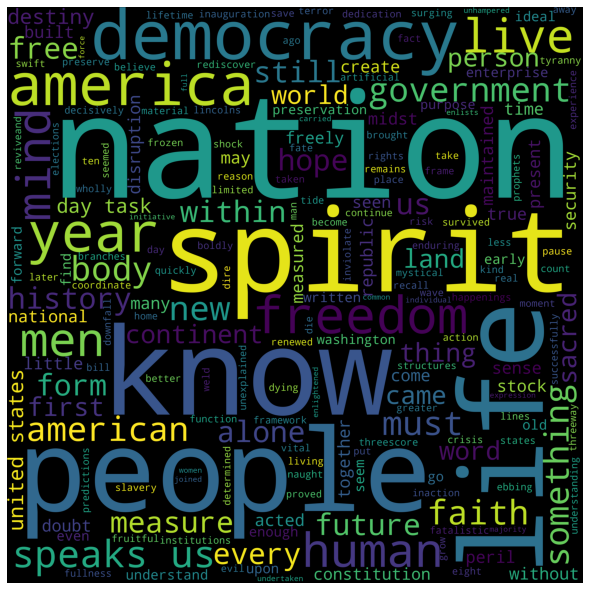

In [168]:
from wordcloud import WordCloud
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech1 (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

**Creating a Wordcloud for Speech 2**

In [169]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)
stop_words_02 = list(stopwords.words('english'))
#stop_words_02.extend(["us","let"])

In [170]:
#Removing stop words (extended list as above) from the corpus 

corpus_02 = df_s2['speech_2_after_remove_stopwords'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words_02])) 
corpus_02

0     vice president johnson mr speaker mr chief jus...
1     sworn almighty god solemn oath forebears l pre...
2                                       world different
3     man holds mortal hands power abolish forms hum...
4     yet revolutionary beliefs forebears fought sti...
5              dare forget today heirs first revolution
6     let word go forth time place friend foe alike ...
7     let every nation know whether wishes us well i...
8                                           much pledge
9     old allies whose cultural spiritual origins sh...
10       united little cannot host cooperative ventures
11    divided little dare meet powerful challenge od...
12    new states welcome ranks free pledge word one ...
13             shall always expect find supporting view
14    shall always hope find strongly supporting fre...
15    peoples huts villages across globe struggling ...
16    free society cannot help many poor cannot save...
17    sister republics south border offer specia

In [171]:
wc_2 = ' '.join(corpus_02)

Word Cloud for Speech2 (after cleaning)!!


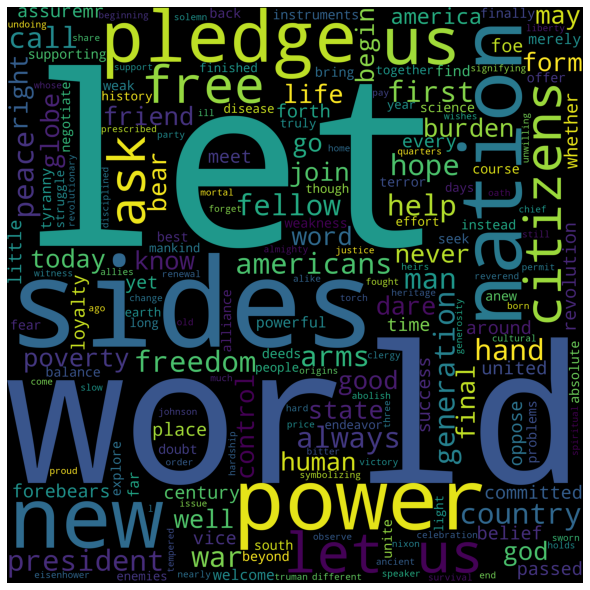

In [172]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech2 (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

**Creating a Wordcloud for speech 3**

In [173]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like us.let)
stop_words_03 = list(stopwords.words('english'))
#stop_words_03.extend(["us","let"])

In [174]:
#Removing stop words (extended list as above) from the corpus 

corpus_03 = df_s3['speech_3_after_remove_stopwords'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words_03])) 
corpus_03

0     mr vice president mr speaker mr chief justice ...
1        meet today stand threshold new era peace world
2                   central question us shall use peace
3     let us resolve era enter postwar periods often...
4     let us resolve become time great responsibilit...
                            ...                        
63      stand place hallowed history think others stood
64    think dreams america think recognized needed h...
65    today ask prayers years ahead may gods help ma...
66    let us pledge together make next four years be...
67    let us go forward confident hope strong faith ...
Name: speech_3_after_remove_stopwords, Length: 68, dtype: object

In [175]:
wc_3 = ' '.join(corpus_03)

Word Cloud for Speech3 (after cleaning)!!


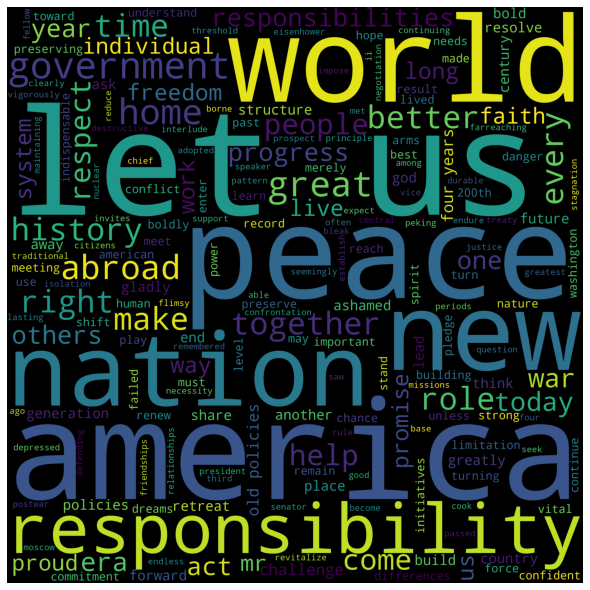

In [176]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech3 (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

                                    **THE END**